In [1]:
#####################################################################
## Clear all variables in the memory
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]


In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from datetime import datetime
import csv
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.tsa.api import SVAR
from statsmodels.tsa.api import VAR
import matplotlib.dates as mdates

pd.set_option('display.max.columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('expand_frame_repr', True)

In [2]:

# ### 피클 파일로 저장할 때 ###
# my_data = ['a','b','c']
# with open("data.pickle","wb") as fw:
#     pickle.dump(my_list, fw)
 
### csv 파일 불러오기 ###
data = pd.read_excel(r'G:\내 드라이브\DATASET\Kakao\daily_sentiment\Data_For_Analysis_20240503.xlsx', sheet_name = None, index_col=0)
data_list = list(data.keys())

date = data['sentiment'].index.strftime("%Y%m%d")    # 날짜

##  Market Data  data['CC'].columns
# 'mktrtn_V', 'mktrtn_V_Used', 'No_CC', 'No_CC_Used', 'mktcap', 'mktcap_Used', 'vol_Used', 'SZ_BMSv', 'SZ_BMSe', 'PR_HMLv', 'PR_HMLe', 
# 'Max_MMLv', 'Max_MMLe', 'Mom_WMLv', 'Mom_WMLe', 'Tvol_HMLv', 'Tvol_HMLe', 'STvol_HMLv', 'STvol_HMLe', 'Vol_HMLv', 'Vol_HMLe', 'CSZv', 
# 'CMOMv', 'CSZe', 'CMOMe', 'mktrtn_V_kr', 'mktrtn_V_Used_kr', 'No_CC_Used_kr', 'vol_Used_kr', 'usrtn_kr', 'SZ_BMSv_kr', 'SZ_BMSe_kr', 
# 'PR_HMLv_kr', 'PR_HMLe_kr', 'Max_MMLv_kr', 'Max_MMLe_kr', 'Mom_WMLv_kr', 'Mom_WMLe_kr', 'Tvol_HMLv_kr', 'Tvol_HMLe_kr', 'STvol_HMLv_kr', 
# 'STvol_HMLe_kr', 'Vol_HMLv_kr', 'Vol_HMLe_kr', 'CSZv_kr', 'CMOMv_kr', 'CSZe_kr', 'CMOMe_kr', 'BTC_kr', 'ETH_kr', 'XRP_kr', 'BTC', 'ETH', 
# 'XRP', 'EX_Kor', 'RiskFree_kr', 'RiskFree', 'TB1Y', 'TB10Y', 'TB10_1Y'
# 'Beta_HMLv', 'Beta_HMLe', 'BetaUp_HMLv', 'BetaUp_HMLe', 'BetaDown_HMLv', 'BetaDown_HMLe', 'IVOL_HMLv', 'IVOL_HMLe', 'Turnover_HMLv', 'Turnover_HMLe'

## Sentiment Data  data['sentiment'].columns
# cnt_r_kr	cnt_kr	score_full_kr	score_full_std_kr	score_full_max_kr	score_full_min_kr	score_title_kr	score_title_std_kr	
# score_title_max_kr	score_title_min_kr	score_content_kr	score_content_std_kr	score_content_max_kr	score_content_min_kr	
# cnt_r	cnt	score_full	score_full_std	score_full_max	score_full_min	score_title	score_title_std	
# score_title_max	score_title_min	score_content	score_content_std	score_content_max	score_content_min
# score_full_4.0, score_full_4.0_std, score_full_4.0_max,score_full_4.0_min, score_title_4.0, score_title_4.0_std,score_title_4.0_max


CC_Data_Agg = pd.concat([pd.DataFrame(data['sentiment'].values, columns=data['sentiment'].columns), pd.DataFrame(data['CC'].values, columns=data['CC'].columns)],axis=1)

In [3]:
CC_Data_Agg['Turnover'] = CC_Data_Agg['vol_Used']/CC_Data_Agg['mktcap_Used']  
# Turnover = 거래량/시가총액
# vol_Used 특정 기간의 자산 거래량
# mktcap_Used 특정 기간의 시가총액

####################################################################################################################################
Cumulative Returns of the Global and Korean Cryptocurrency Markets: Figure 2
-------------------------------------------------------------------------------------------------------------------------


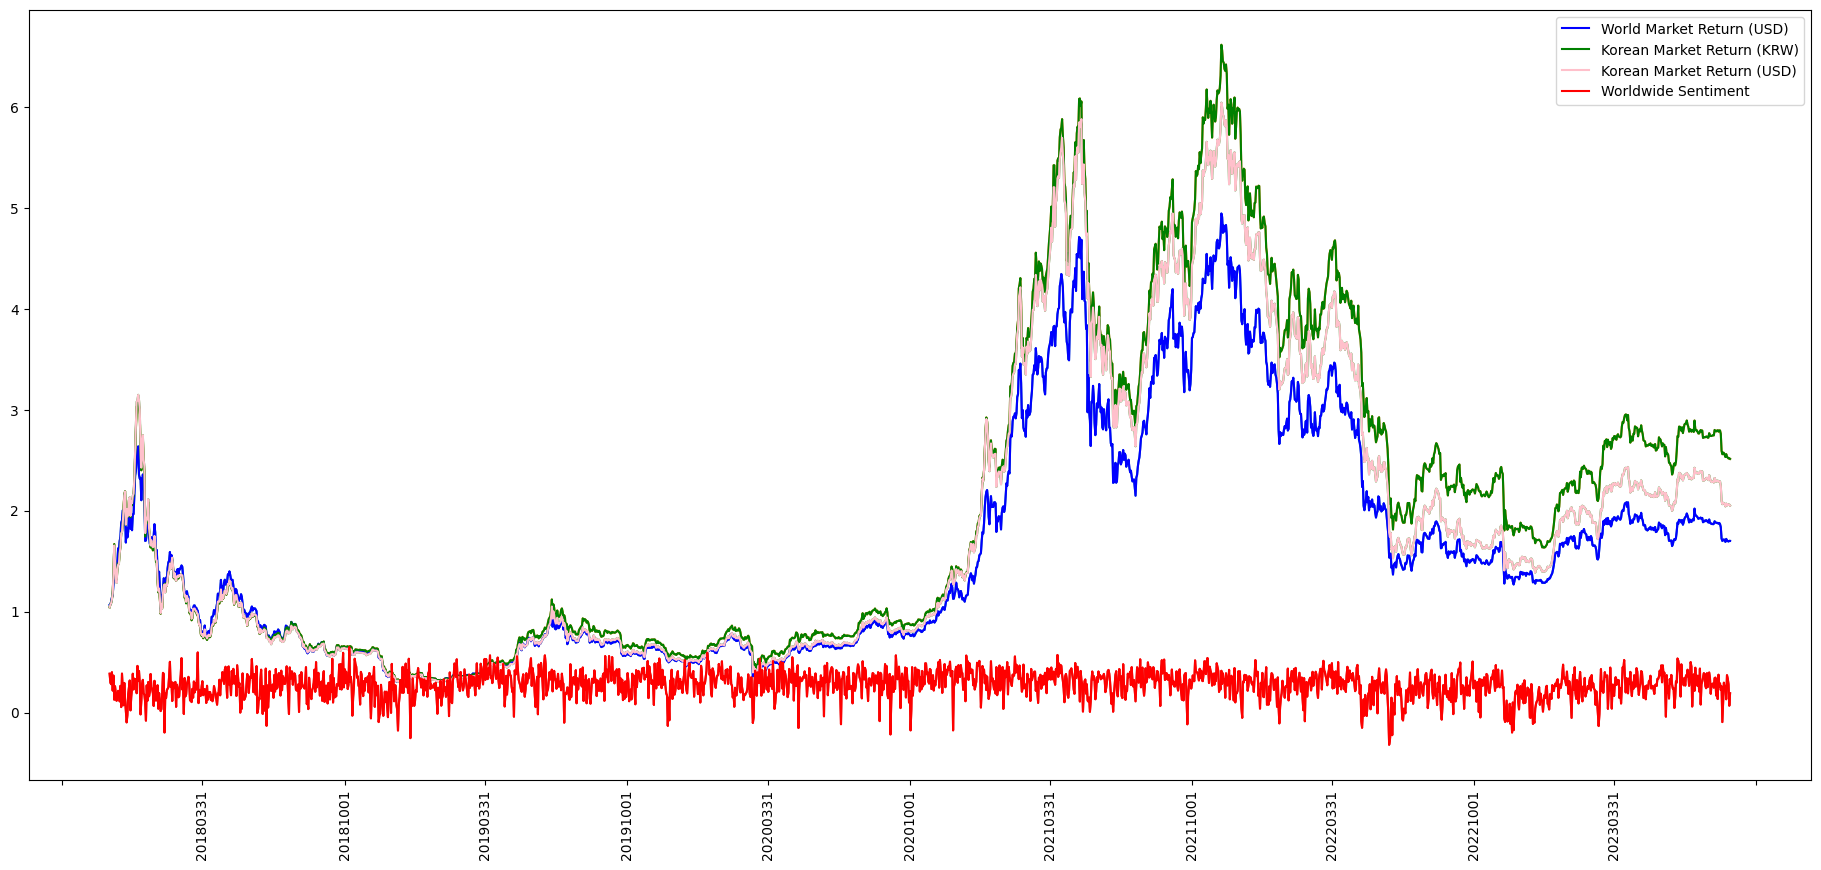

In [4]:
print("####################################################################################################################################")
print("Cumulative Returns of the Global and Korean Cryptocurrency Markets: Figure 2")
print("-------------------------------------------------------------------------------------------------------------------------")
culm_mktrtn =  (np.cumprod(1+CC_Data_Agg['mktrtn_V_Used']))
culm_mktrtn_kr =  (np.cumprod(1+CC_Data_Agg['mktrtn_V_kr']))
culm_mktrtn_kr_ex =  (np.cumprod((1+CC_Data_Agg['mktrtn_V_kr'])/(1+CC_Data_Agg['EX_Kor'])))
# EX_Kor 환율
plt.figure(figsize=(23, 10))
pics=pd.DataFrame(pd.concat([culm_mktrtn,culm_mktrtn_kr,culm_mktrtn_kr_ex, CC_Data_Agg['score_full']], axis=1))
pics.index=date
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=90)  # Rotate dates vertically
plt.plot(pics)
plt.plot(culm_mktrtn, label='World Market Return (USD)', color='blue')
plt.plot(culm_mktrtn_kr, label='Korean Market Return (KRW)', color='green')
plt.plot(culm_mktrtn_kr_ex , label='Korean Market Return (USD)', color='pink')
plt.plot(pics['score_full'], label='Worldwide Sentiment', color='red')
plt.legend()
plt.show()


In [12]:
data['CC'].columns

Index(['mktrtn_V', 'mktrtn_V_Used', 'No_CC', 'No_CC_Used', 'mktcap',
       'mktcap_Used', 'vol_Used', 'SZ_BMSv', 'SZ_BMSe', 'PR_HMLv', 'PR_HMLe',
       'Max_MMLv', 'Max_MMLe', 'Mom_WMLv', 'Mom_WMLe', 'Tvol_HMLv',
       'Tvol_HMLe', 'STvol_HMLv', 'STvol_HMLe', 'Vol_HMLv', 'Vol_HMLe', 'CSZv',
       'CMOMv', 'CSZe', 'CMOMe', 'Beta_HMLv', 'Beta_HMLe', 'BetaUp_HMLv',
       'BetaUp_HMLe', 'BetaDown_HMLv', 'BetaDown_HMLe', 'IVOL_HMLv',
       'IVOL_HMLe', 'Turnover_HMLv', 'Turnover_HMLe', 'mktrtn_V_kr',
       'mktrtn_V_Used_kr', 'No_CC_Used_kr', 'vol_Used_kr', 'usrtn_kr',
       'SZ_BMSv_kr', 'SZ_BMSe_kr', 'PR_HMLv_kr', 'PR_HMLe_kr', 'Max_MMLv_kr',
       'Max_MMLe_kr', 'Mom_WMLv_kr', 'Mom_WMLe_kr', 'Tvol_HMLv_kr',
       'Tvol_HMLe_kr', 'STvol_HMLv_kr', 'STvol_HMLe_kr', 'Vol_HMLv_kr',
       'Vol_HMLe_kr', 'CSZv_kr', 'CMOMv_kr', 'CSZe_kr', 'CMOMe_kr', 'BTC_kr',
       'ETH_kr', 'XRP_kr', 'BTC', 'ETH', 'XRP', 'EX_Kor', 'RiskFree_kr',
       'RiskFree', 'TB1Y', 'TB10Y', 'TB10_1Y'],
     

In [5]:
# the geometric average returns
kkk=pd.concat([culm_mktrtn, culm_mktrtn_kr, culm_mktrtn_kr_ex], axis=1)
print(kkk.iloc[-1,:]**(1/2097)-1)

mktrtn_V_Used    0.000253
mktrtn_V_kr      0.000440
0                0.000343
Name: 2096, dtype: float64


In [6]:
# 데이터프레임의 인덱스를 날짜로 설정
Sample_CC_Data_Agg = CC_Data_Agg.set_index(date)
Sample_CC_Data_Agg

# sample1_CC_Data_Agg: 2021년 3월 1일부터 2021년 8월 31일까지
sample1_start_date = '20210301'
sample1_end_date = '20210831'
sample1_CC_Data_Agg = Sample_CC_Data_Agg.loc[sample1_start_date:sample1_end_date].reset_index(drop=True)

# sample2_CC_Data_Agg: 2023년 2월 1일부터 2023년 8월 28일까지
sample2_start_date = '20230201'
sample2_end_date = '20230828'
sample2_CC_Data_Agg = Sample_CC_Data_Agg.loc[sample2_start_date:sample2_end_date].reset_index(drop=True)

In [6]:
# ####################################################################################################################################
print("####################################################################################################################################")
print("Statistical Properties of Sentiment Scores and CC Factors: Tables 2 and 3")
print("-------------------------------------------------------------------------------------------------------------------------")

# ####################################################################################################################################


# ####################################################################################################################################
# Calculating basic statistics for cryptocurrency news sentiment
## Sentiment Data
# cnt_r_kr	cnt_kr	score_full_kr	score_full_std_kr	score_full_max_kr	score_full_min_kr	score_title_kr	score_title_std_kr	
# score_title_max_kr	score_title_min_kr	score_content_kr	score_content_std_kr	score_content_max_kr	score_content_min_kr	
# cnt_r	cnt	score_full	score_full_std	score_full_max	score_full_min	score_title	score_title_std	
# score_title_max	score_title_min	score_content	score_content_std	score_content_max	score_content_min

# ####################################################################################################################################

# 'cnt','score_full','score_title','score_content',
df = CC_Data_Agg[['count', 'score_full', 'score_title','score_content', \
                  'cnt_kr','score_full_kr','score_title_kr','score_content_kr',\
                  'score_full_4.0', 'score_title_4.0']]
mean_values = df.mean()
std_dev_values = df.std()
skewness_values = df.skew()
kurtosis_values = df.kurtosis()
autocorrelation = df.apply(lambda x: x.autocorr(lag=1))

# Creating a DataFrame to hold these statistics
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Std Dev': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values,
    'Autocorrelation (lag 1)': autocorrelation
})

# Calculating correlation matrix
correlation_matrix = df.corr()

output = pd.concat([stats_df,correlation_matrix], axis=1)

# Displaying the final matrix
print("Cryptocurrency News")
print(output)



# path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis2.xlsx"
# if not os.path.exists(path):    
#     with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
#         output.to_excel(writer, sheet_name = 'sentiment')
# else:
#     with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
#         output.to_excel(writer, sheet_name = 'sentiment')   


# ####################################################################################################################################
# Calculating basic statistics for cryptocurrency market data
# market Data
# 'mktrtn_V', 'mktrtn_V_Used', 'No_CC', 'No_CC_Used', 'mktcap', 'mktcap_Used', 'vol_Used', 'SZ_BMSv', 'SZ_BMSe', 'PR_HMLv', 'PR_HMLe', 
# 'Max_MMLv', 'Max_MMLe', 'Mom_WMLv', 'Mom_WMLe', 'Tvol_HMLv', 'Tvol_HMLe', 'STvol_HMLv', 'STvol_HMLe', 'Vol_HMLv', 'Vol_HMLe', 'CSZv', 
# 'CMOMv', 'CSZe', 'CMOMe', 'mktrtn_V_kr', 'mktrtn_V_Used_kr', 'No_CC_Used_kr', 'vol_Used_kr', 'usrtn_kr', 'SZ_BMSv_kr', 'SZ_BMSe_kr', 
# 'PR_HMLv_kr', 'PR_HMLe_kr', 'Max_MMLv_kr', 'Max_MMLe_kr', 'Mom_WMLv_kr', 'Mom_WMLe_kr', 'Tvol_HMLv_kr', 'Tvol_HMLe_kr', 'STvol_HMLv_kr', 
# 'STvol_HMLe_kr', 'Vol_HMLv_kr', 'Vol_HMLe_kr', 'CSZv_kr', 'CMOMv_kr', 'CSZe_kr', 'CMOMe_kr', 'BTC_kr', 'ETH_kr', 'XRP_kr', 'BTC', 'ETH', 
# 'XRP', 'EX_Kor', 'RiskFree_kr', 'RiskFree'
# 'Beta_HMLv', 'Beta_HMLe', 'BetaUp_HMLv', 'BetaUp_HMLe', 'BetaDown_HMLv', 'BetaDown_HMLe', 'IVOL_HMLv', 'IVOL_HMLe', 

df = CC_Data_Agg[['No_CC_Used','mktcap_Used','vol_Used','mktrtn_V_Used','CSZv','CMOMv', \
                  'Beta_HMLv', 'BetaUp_HMLv', 'BetaDown_HMLv', 'SZ_BMSv', 'PR_HMLv', 'Max_MMLv', 'Mom_WMLv', 'Tvol_HMLv', 'Turnover_HMLv', 'Vol_HMLv', 'IVOL_HMLv',  \
                    'No_CC_Used_kr','vol_Used_kr','mktrtn_V_Used_kr','CSZv_kr','CMOMv_kr', \
                        'SZ_BMSv_kr', 'PR_HMLv_kr', 'Max_MMLv_kr', 'Mom_WMLv_kr', 'Tvol_HMLv_kr', 'STvol_HMLv_kr', 'Vol_HMLv_kr']]
mean_values = df.mean()
std_dev_values = df.std()
skewness_values = df.skew()
kurtosis_values = df.kurtosis()
autocorrelation = df.apply(lambda x: x.autocorr(lag=1))

# Creating a DataFrame to hold these statistics
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Std Dev': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values,
    'Autocorrelation (lag 1)': autocorrelation
})

# Calculating correlation matrix
correlation_matrix = df.corr()

output = pd.concat([stats_df,correlation_matrix], axis=1)

# Displaying the final matrix
print("World Cryptocurrency News")
print(output)



# path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis2.xlsx"
# if not os.path.exists(path):    
#     with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
#         output.to_excel(writer, sheet_name = 'CC_data')
# else:
#     with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
#         output.to_excel(writer, sheet_name = 'CC_data')   


df = CC_Data_Agg[['count_e', 'score_full_e', 'score_title_e','score_content_e','cnt_kr','score_full_kr','score_title_kr','score_content_kr', \
                  'No_CC_Used','mktcap_Used','vol_Used','mktrtn_V_Used','CSZv','CMOMv', \
                  'Beta_HMLv', 'BetaUp_HMLv', 'BetaDown_HMLv', 'SZ_BMSv', 'PR_HMLv', 'Max_MMLv', 'Mom_WMLv', 'Tvol_HMLv', 'Turnover_HMLv', 'Vol_HMLv', 'IVOL_HMLv',  \
                    'No_CC_Used_kr','vol_Used_kr','mktrtn_V_Used_kr','CSZv_kr','CMOMv_kr', \
                        'SZ_BMSv_kr', 'PR_HMLv_kr', 'Max_MMLv_kr', 'Mom_WMLv_kr', 'Tvol_HMLv_kr', 'STvol_HMLv_kr', 'Vol_HMLv_kr']]
mean_values = df.mean()
std_dev_values = df.std()
skewness_values = df.skew()
kurtosis_values = df.kurtosis()
autocorrelation = df.apply(lambda x: x.autocorr(lag=1))

# Creating a DataFrame to hold these statistics
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Std Dev': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values,
    'Autocorrelation (lag 1)': autocorrelation
})

# Calculating correlation matrix
correlation_matrix = df.corr()

output = pd.concat([stats_df,correlation_matrix], axis=1)

# Displaying the final matrix
print("World Cryptocurrency News")
print(output)



# path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis2.xlsx"
# if not os.path.exists(path):    
#     with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
#         output.to_excel(writer, sheet_name = 'Sent_CC_data')
# else:
#     with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
#         output.to_excel(writer, sheet_name = 'Sent_CC_data')   


####################################################################################################################################
Statistical Properties of Sentiment Scores and CC Factors: Tables 2 and 3
-------------------------------------------------------------------------------------------------------------------------
Cryptocurrency News
                       Mean    Std Dev  Skewness  Kurtosis  \
count_e           46.565570  22.413268  0.353041 -0.826087   
score_full_e       0.282044   0.133770 -0.712204  1.051302   
score_title_e      0.227677   0.134925 -0.573052  0.627310   
score_content_e    0.247942   0.126674 -0.683806  1.116409   
cnt_kr             9.852647   4.724241  0.483675 -0.146236   
score_full_kr      0.107771   0.223003  0.214280  2.012065   
score_title_kr     0.076465   0.228986 -0.155462  1.709855   
score_content_kr   0.091611   0.174323  0.284357  2.543381   
score_full_4.0     0.121339   0.165037 -0.438285  0.456476   
score_title_4.0    0.070515   0

In [18]:
path = "G:\\내 드라이브\\DATASET\\Kakao\\Analysis\\Analysis2.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        output.to_excel(writer, sheet_name = 'Sent_CC_data')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        output.to_excel(writer, sheet_name = 'Sent_CC_data')  

In [40]:
# # ################################################################################################################
# # Lead-lag relationship between Korean amd World Sentiment:  Table 2 Panel B
# # ################################################################################################################

# news_type = ['score_full', 'score_title', 'score_content']
# results_dfs = []

# for nt in news_type:
#     for lags in range(0,8):
#         print("=====================================================================================================")
#         print("Types of News: ", nt+"_kr", "           Number of Lags: ", lags)
#         print("-----------------------------------------------------------------------------------------------------")
#         CC_Data_Agg_lag = CC_Data_Agg.shift(lags)
#         CC_Data_Agg_lag = CC_Data_Agg_lag.iloc[lags:,]

#         model = sm.OLS(CC_Data_Agg[nt+"_kr"].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[[nt]].values)).fit().get_robustcov_results()
#         # Fit the OLS model with robust standard errors
#         if isinstance(model.params, pd.Series) and model.params.index is not None:
#             # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
#             results_df = pd.DataFrame({
#                 'Coefficients': model.params,
#                 't-values': model.tvalues
#             }, index=model.params.index)
#         else:
#             # Manually create an index for the DataFrame
#             index_names = ['const'] + list(CC_Data_Agg_lag[[nt]].columns)
#             results_df = pd.DataFrame({
#                 'Coefficients': model.params,
#                 't-values': model.tvalues
#             }, index=index_names)
#         # results_df.loc['const', 'R-squared'] = 'R-squared'
#         results_df.loc['const', 'R-squared'] = model.rsquared    
#         results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag) 

#         # Add a column to identify the news type and number of lags
#         results_df['News_Type'] = nt
#         results_df['Lags'] = lags

#         # Append the results DataFrame to the list
#         results_dfs.append(results_df)


#         print(results_df)
#         print("-----------------------------------------------------------------------------------------------------")



for nt in news_type:
    for lags in range(0,8):
        print("=====================================================================================================")
        print("Types of News: ", nt, "           Number of Lags: ", lags)
        print("-----------------------------------------------------------------------------------------------------")
        CC_Data_Agg_lag = CC_Data_Agg.shift(lags)
        CC_Data_Agg_lag = CC_Data_Agg_lag.iloc[lags:,]

        model = sm.OLS(CC_Data_Agg[nt].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[[nt+"_kr"]].values)).fit().get_robustcov_results()
        # Fit the OLS model with robust standard errors
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            # Manually create an index for the DataFrame
            index_names = ['const'] + list(CC_Data_Agg_lag[[nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
        # results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared    
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag) 

        # Add a column to identify the news type and number of lags
        results_df['News_Type'] = nt
        results_df['Lags'] = lags

        # Append the results DataFrame to the list
        results_dfs.append(results_df)


        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")



# Concatenate all DataFrames in the list into a single DataFrame
final_results_df = pd.concat(results_dfs)

path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        final_results_df.to_excel(writer, sheet_name = 'Lead-Lag')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        final_results_df.to_excel(writer, sheet_name = 'Lead-Lag')   

# print("=====================================================================================================")
# print("Granger Causality Test")
# print("-----------------------------------------------------------------------------------------------------")

# df = pd.DataFrame()
# df['Sent_HB (World)'] = CC_Data_Agg["score_full"]    # X
# df['Sent_HB (Korea)'] = CC_Data_Agg["score_full_kr"]        # Y

# fit = sm.tsa.VAR(df.dropna()).fit(maxlags=15, ic='aic')
# print(fit.summary())

# forecast_num = 20 
# fit.plot_forecast(forecast_num) 
# plt.tight_layout() 
# plt.show()

# fit.irf(forecast_num).plot() 
# plt.tight_layout() 
# plt.show()

# # Granger Causality 테스트 
# print('score_full -> score_full_kr')      # X => Y
# granger_result1 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,:].values, maxlag=2, verbose=True)    
# print('score_full_kr -> score_full')      # Y => X
# granger_result2 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,[1,0]].values, maxlag=2, verbose=True)

# # 해외: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으키지는 않음
# # 국내: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으킴



Types of News:  score_full            Number of Lags:  0
-----------------------------------------------------------------------------------------------------
            Coefficients   t-values  R-squared  No_of_Days   News_Type  Lags
const           0.258656  79.084031   0.101076      2097.0  score_full     0
score_full      0.188663  14.111505        NaN         NaN  score_full     0
-----------------------------------------------------------------------------------------------------
Types of News:  score_full            Number of Lags:  1
-----------------------------------------------------------------------------------------------------
            Coefficients   t-values  R-squared  No_of_Days   News_Type  Lags
const           0.265533  79.533703   0.043903      2096.0  score_full     1
score_full      0.124328   8.452532        NaN         NaN  score_full     1
-----------------------------------------------------------------------------------------------------
Types of News:  

In [34]:
#########################################################################################
# Testing which days of week have higher or lower returns: Table 2 Panel C
#########################################################################################

weekdays_vector = pd.DataFrame(np.full((len(date), 7), np.nan), index=date, columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

date_series = pd.Series(date)

def get_weekday(date_str):
    # Convert string to datetime object
    date_obj = pd.to_datetime(date_str, format='%Y%m%d')
    # Get the weekday (e.g., 'Monday', 'Tuesday', etc.)
    return date_obj.day_name()

# Applying the function to each date in the pandas Series to get weekdays
weekdays = date_series.apply(get_weekday)
weekdays_vector['Monday'] = (weekdays.values == 'Monday').astype(int)
weekdays_vector['Tuesday'] = (weekdays.values == 'Tuesday').astype(int)
weekdays_vector['Wednesday'] = (weekdays.values == 'Wednesday').astype(int)
weekdays_vector['Thursday'] = (weekdays.values == 'Thursday').astype(int)
weekdays_vector['Friday'] = (weekdays.values == 'Friday').astype(int)
weekdays_vector['Saturday'] = (weekdays.values == 'Saturday').astype(int)
weekdays_vector['Sunday'] = (weekdays.values == 'Sunday').astype(int)

results_dfs = []

# score_full_kr, score_full, mktrtn_V_Used, mktrtn_V_Used_ㅏㄱ

model = sm.OLS(CC_Data_Agg['score_full_kr'], weekdays_vector[['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']].values).fit().get_robustcov_results()
        # Fit the OLS model with robust standard errors
print(model.summary())
# if isinstance(model.params, pd.Series) and model.params.index is not None:
#     # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
#     results_df = pd.DataFrame({
#         'Coefficients': model.params,
#         't-values': model.tvalues
#     }, index=model.params.index)
# else:
#     # Manually create an index for the DataFrame
#     index_names = ['const'] + list(list(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']))
#     results_df = pd.DataFrame({
#         'Coefficients': model.params,
#         't-values': model.tvalues
#     }, index=index_names)
# results_df.loc['const', 'R-squared'] = model.rsquared    
# results_df.loc['const', 'No_of_Days'] = len(date) 


# vol: 해외는 수, 토, 일요일에 거래가 많고, 국내는 일요일에 거래가 많음
# 수익률: 요일간 차이는 없음
# cnt: 한국 해외 모두 토요일 건수가 적음
# sent_full: 해외 일요일 양, 금요일 음,  한국 일수목 양
# sent_full_std: 해외 일요일 양 
# CSZv: 해외 일요일 음, 국내 금토 음
# CMOMv:  해외 일요일 음, 국내 목 음



                            OLS Regression Results                            
Dep. Variable:          score_full_kr   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 20 May 2024   Prob (F-statistic):                nan
Time:                        12:30:53   Log-Likelihood:                 178.22
No. Observations:                2097   AIC:                            -342.4
Df Residuals:                    2090   BIC:                            -302.9
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1127      0.011      9.968      0.0

In [7]:
CC_Data_Agg

,cnt_r_kr,cnt_kr,score_full_kr,score_full_std_kr,score_full_max_kr,score_full_min_kr,score_title_kr,score_title_std_kr,score_title_max_kr,score_title_min_kr,score_content_kr,score_content_std_kr,score_content_max_kr,score_content_min_kr,cnt_r,cnt,score_full,score_full_std,score_full_max,score_full_min,score_title,score_title_std,score_title_max,score_title_min,score_content,score_content_std,score_content_max,score_content_min,score_full_4.0,score_full_4.0_std,score_full_4.0_max,score_full_4.0_min,score_title_4.0,score_title_4.0_std,score_title_4.0_max,score_title_4.0_min,score_full_e,score_full_std_e,count_e,score_title_e,score_title_std_e,score_content_e,score_content_std_e,mktrtn_V,mktrtn_V_Used,No_CC,No_CC_Used,mktcap,mktcap_Used,vol_Used,...,CSZv,CMOMv,CSZe,CMOMe,Beta_HMLv,Beta_HMLe,BetaUp_HMLv,BetaUp_HMLe,BetaDown_HMLv,BetaDown_HMLe,IVOL_HMLv,IVOL_HMLe,Turnover_HMLv,Turnover_HMLe,mktrtn_V_kr,mktrtn_V_Used_kr,No_CC_Used_kr,vol_Used_kr,usrtn_kr,SZ_BMSv_kr,SZ_BMSe_kr,PR_HMLv_kr,PR_HMLe_kr,Max_MMLv_kr,Max_MMLe_kr,Mom_WMLv_kr,Mom_WMLe_kr,Tvol_HMLv_kr,Tvol_HMLe_kr,STvol_HMLv_kr,STvol_HMLe_kr,Vol_HMLv_kr,Vol_HMLe_kr,CSZv_kr,CMOMv_kr,CSZe_kr,CMOMe_kr,BTC_kr,ETH_kr,XRP_kr,BTC,ETH,XRP,EX_Kor,RiskFree_kr,RiskFree,TB1Y,TB10Y,TB10_1Y,Turnover
0,69.0,11.0,0.000000,0.447214,1.0,-1.0,0.090909,0.490825,1.0,-1.0,0.045455,0.471940,1.00,-1.0,224.0,74.0,0.385135,0.457714,1.0,-1.0,0.324324,0.552655,1.0,-1.0,0.333784,0.467074,1.0,-1.0,0.254054,0.558665,1.0,-1.0,0.212162,0.583788,1.0,-1.0,0.369118,0.466571,68.0,0.338235,0.553423,0.313235,0.474390,0.065754,0.066502,401.0,291.0,3.225272e+11,3.224428e+11,1.332066e+10,...,-0.033788,0.016067,-0.025606,0.019080,0.055111,-0.071048,0.036017,-0.060669,0.061894,-0.077654,-0.032654,-0.038515,-0.026526,-0.005266,0.044969,0.045456,23.0,1.199838e+12,0.065113,-0.132407,-0.101646,-0.003738,-0.091770,0.039838,0.089370,-0.044491,0.050734,-0.026030,-0.032975,0.059836,0.091050,-0.003940,0.025291,-0.055329,0.031932,-0.062139,0.060751,0.050021,0.027121,0.017730,0.072506,0.043448,0.019217,0.002494,0.000041,0.000031,0.000044,0.000064,0.000020,0.041312
1,22.0,6.0,0.166667,0.752773,1.0,-1.0,0.333333,0.516398,1.0,0.0,0.416667,0.376386,1.00,0.0,71.0,24.0,0.295833,0.471334,0.8,-1.0,0.341667,0.415898,0.8,-0.8,0.208333,0.375229,0.8,-0.8,0.166667,0.471507,1.0,-1.0,0.091667,0.486261,1.0,-1.0,0.286957,0.479872,23.0,0.321739,0.413364,0.217391,0.380970,0.005776,0.005754,400.0,293.0,3.244886e+11,3.244008e+11,1.050223e+10,...,-0.087176,0.025623,-0.053694,0.004663,0.055186,0.042824,0.021935,0.061276,0.113216,0.126015,-0.029383,0.078899,-0.040633,-0.007328,0.026205,0.026497,23.0,1.280121e+12,0.004845,-0.127087,-0.250084,-0.006065,-0.068870,0.001559,0.104407,-0.010977,-0.059291,-0.161117,-0.230425,0.057346,0.083732,-0.034455,0.091943,-0.093064,0.077068,-0.199368,0.101290,0.035030,0.011798,0.010453,0.009020,-0.006625,-0.000810,0.000000,0.000041,0.000031,0.000044,0.000064,0.000020,0.032374
2,44.0,5.0,0.200000,0.447214,1.0,0.0,0.000000,0.000000,0.0,0.0,0.100000,0.223607,0.50,0.0,83.0,32.0,0.281250,0.500604,0.8,-0.8,0.259375,0.568450,0.8,-0.8,0.190625,0.491449,0.8,-0.8,0.156250,0.589662,1.0,-1.0,0.100000,0.672022,1.0,-1.0,0.275000,0.519704,28.0,0.221429,0.585856,0.182143,0.517153,0.026705,0.026693,402.0,296.0,3.333414e+11,3.332536e+11,1.371379e+10,...,-0.033983,0.031676,-0.020843,0.038886,-0.057354,0.049733,-0.030416,0.040264,0.001069,-0.012698,0.037719,-0.012686,0.017326,0.022015,0.014705,0.014888,23.0,1.162102e+12,0.024189,-0.038147,-0.032980,0.022453,0.041000,-0.043634,-0.037665,-0.071691,-0.041849,-0.038415,-0.049447,0.002652,-0.003208,-0.040459,-0.034782,-0.007659,-0.030134,-0.025305,-0.048297,0.012104,-0.000555,-0.010345,0.022448,0.005187,-0.011484,0.000000,0.000041,0.000031,0.000044,0.000066,0.000022,0.041151
3,199.0,16.0,0.312500,0.478714,1.0,0.0,0.243750,0.507239,1.0,-1.0,0.218750,0.515388,1.00,-1.0,295.0,75.0,0.400000,0.469617,1.0,-1.0,0.366667,0.505733,1.0,-1.0,0.402667,0.418806,1.0,-1.0,0.153333,0.544092,1.0,-1.0,0.049333,0.59

In [12]:
# ################################################################################################################
# Contemporaneous Regression of Common Factors and Portfolios Formed on Characteristics on Sentiment: Table 4
# ################################################################################################################

print("################################################################################################################")
print("Contemporaneous Regression of Common Factors and Portfolios Formed on Characteristics on Sentiment")
print("=====================================================================================================")


news_type = CC_Data_Agg[['cnt','cnt_r','score_full', 'score_title', 'score_content','score_full_4.0','score_title_4.0','score_full_kr', 'score_title_kr', 'score_content_kr']]
results_dfs = []
rtn_dep = CC_Data_Agg[['cnt','mktrtn_V_Used', 'CSZv', 'CMOMv', 'Beta_HMLv', 'BetaUp_HMLv', 'BetaDown_HMLv', 'SZ_BMSv', 'PR_HMLv', 'Max_MMLv', 'Mom_WMLv', 'Tvol_HMLv', 'Turnover_HMLv', 'Vol_HMLv', 'IVOL_HMLv', \
                       'cnt_kr','mktrtn_V_Used_kr', 'CSZv_kr', 'CMOMv_kr', 'SZ_BMSv_kr', 'PR_HMLv_kr', 'Max_MMLv_kr', 'Mom_WMLv_kr', 'Tvol_HMLv_kr', 'STvol_HMLv_kr', 'Vol_HMLv_kr']]


for dv in rtn_dep:
    print("=====================================================================================================")
    print("Dependent Variable: ", dv)


    # Fit the OLS model with CC factors
    model = sm.OLS(rtn_dep[dv], np.ones(len(rtn_dep[dv]))).fit().get_robustcov_results()
    # Fit the OLS model with robust standard errors
    if isinstance(model.params, pd.Series) and model.params.index is not None:
        # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=model.params.index)
    else:
        # Manually create an index for the DataFrame
        index_names = ['const']
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=index_names)
    results_df.loc['const', 'R-squared'] = 'R-squared'
    results_df.loc['const', 'R-squared'] = model.rsquared    
    results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    results_dfs.append(results_df)
    print(results_df)
    print("-----------------------------------------------------------------------------------------------------")

    # # Fit the OLS model with CC factors
    # model = sm.OLS(rtn_dep[dv], sm.add_constant(pd.concat([news_type[[nt]], rtn_dep['cnt']],axis=1))).fit().get_robustcov_results()
    # # Fit the OLS model with robust standard errors
    # if isinstance(model.params, pd.Series) and model.params.index is not None:
    #     # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
    #     results_df = pd.DataFrame({
    #         'Coefficients': model.params,
    #         't-values': model.tvalues
    #     }, index=model.params.index)
    # else:
    #     # Manually create an index for the DataFrame
    #     index_names = ['const'] + list(news_type[[nt]].columns) + ['cnt']
    #     results_df = pd.DataFrame({
    #         'Coefficients': model.params,
    #         't-values': model.tvalues
    #     }, index=index_names)
    # results_df.loc['const', 'R-squared'] = 'R-squared'
    # results_df.loc['const', 'R-squared'] = model.rsquared    
    # results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    # results_dfs.append(results_df)
    # print(results_df)
    # print("-----------------------------------------------------------------------------------------------------")


    for nt in news_type:

        # Fit the OLS model with robust standard errors
        model = sm.OLS(rtn_dep[dv], sm.add_constant(news_type[[nt]])).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(news_type[[nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")




 

# # Concatenate all DataFrames in the list into a single DataFrame
# final_results_df = pd.concat(results_dfs)

# path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
# if not os.path.exists(path):    
#     with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
#         final_results_df.to_excel(writer, sheet_name = 'cntp_KR=>WD')
# else:
#     with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
#         final_results_df.to_excel(writer, sheet_name = 'cntp_KR=>WD')   
    




################################################################################################################
Contemporaneous Regression of Common Factors and Portfolios Formed on Characteristics on Sentiment
Dependent Variable:  cnt
       Coefficients   t-values R-squared  No_of_Days
const      49.06867  94.572826       0.0      2097.0
-----------------------------------------------------------------------------------------------------
       Coefficients      t-values R-squared  No_of_Days
const -1.006369e-13 -3.265395e+01       1.0      2097.0
cnt    1.000000e+00  1.991305e+16       NaN         NaN
-----------------------------------------------------------------------------------------------------
       Coefficients   t-values R-squared  No_of_Days
const     13.052983  38.989799  0.887325      2097.0
cnt_r      0.227487  94.113569       NaN         NaN
-----------------------------------------------------------------------------------------------------
              Coefficien

In [15]:
# ################################################################################################################
# Contemporaneous Regression of Common Factors and Portfolios Formed on Characteristics on Sentiment: Table 4
# ################################################################################################################

print("################################################################################################################")
print("Contemporaneous Regression of Common Factors and Portfolios Formed on Characteristics on Sentiment")
print("=====================================================================================================")

# 'TB1Y', 'TB10Y', 'TB10_1Y'
news_type = CC_Data_Agg[['score_full_e', 'score_title_e', 'score_content_e','score_full_4.0']]
results_dfs = []
rtn_dep = CC_Data_Agg[['mktrtn_V_Used']]
# rtn_dep = CC_Data_Agg[['cnt','mktrtn_V_Used', 'CSZv', 'CMOMv', 'Beta_HMLv', 'BetaUp_HMLv', 'BetaDown_HMLv', 'SZ_BMSv', 'PR_HMLv', 'Max_MMLv', 'Mom_WMLv', 'Tvol_HMLv', 'STvol_HMLv', 'Vol_HMLv', 'IVOL_HMLv', \
#                        'cnt_kr','mktrtn_V_Used_kr', 'CSZv_kr', 'CMOMv_kr', 'SZ_BMSv_kr', 'PR_HMLv_kr', 'Max_MMLv_kr', 'Mom_WMLv_kr', 'Tvol_HMLv_kr', 'STvol_HMLv_kr', 'Vol_HMLv_kr']]

CC_Data_Agg['RiskFree100']= CC_Data_Agg['RiskFree']*100
CC_Data_Agg['TB10_1Y100']= CC_Data_Agg['TB10_1Y']*100
CC_Data_Agg['cnt_r/100']= CC_Data_Agg['cnt_r']/100

for dv in rtn_dep:
    print("=====================================================================================================")
    print("Dependent Variable: ", dv)



    for nt in news_type:

        # Fit the OLS model with robust standard errors
        # 'cnt_r', 'vol_Used',
        model = sm.OLS(rtn_dep[dv], sm.add_constant(CC_Data_Agg[['cnt_r/100', 'Turnover','RiskFree100','TB10_1Y100',nt]])).fit().get_robustcov_results()  
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg[['cnt_r/100', 'Turnover','RiskFree100','TB10_1Y100',nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")




 

# Concatenate all DataFrames in the list into a single DataFrame
final_results_df = pd.concat(results_dfs)

path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        final_results_df.to_excel(writer, sheet_name = 'cntp_KR=>WD')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        final_results_df.to_excel(writer, sheet_name = 'cntp_KR=>WD')   
    

################################################################################################################
Contemporaneous Regression of Common Factors and Portfolios Formed on Characteristics on Sentiment
Dependent Variable:  mktrtn_V_Used
              Coefficients  t-values R-squared  No_of_Days
const             0.001268  0.178825  0.021726      2097.0
cnt_r/100        -0.000599 -0.541973       NaN         NaN
Turnover         -0.013354 -0.869587       NaN         NaN
RiskFree100      -1.322196 -1.693195       NaN         NaN
TB10_1Y100       -2.486191 -1.673970       NaN         NaN
score_full_e      0.039436  4.864574       NaN         NaN
-----------------------------------------------------------------------------------------------------
               Coefficients  t-values R-squared  No_of_Days
const              0.006544  0.890889  0.013319      2097.0
cnt_r/100         -0.001069 -0.944226       NaN         NaN
Turnover          -0.012305 -0.797113       NaN         Na

In [20]:
# ################################################################################################################
# Individual CCs Return on contemporaneous variables: Table 5
# ################################################################################################################

print("################################################################################################################")
print("Individual CCs")
print("=====================================================================================================")

# news_type = ['score_full_kr', 'score_title_kr', 'score_content_kr']
news_type = ['score_full_e', 'score_title_e', 'score_content_e']
results_dfs = []
rtn_dep = CC_Data_Agg[['BTC', 'ETH', 'XRP']]

for dv in rtn_dep:
    print(dv)
    # Fit the OLS model without explanatory variables
    model = sm.OLS(rtn_dep[dv]-CC_Data_Agg['RiskFree'], np.ones(len(CC_Data_Agg['mktrtn_V_Used']))).fit().get_robustcov_results()
    # Fit the OLS model with robust standard errors
    if isinstance(model.params, pd.Series) and model.params.index is not None:
        # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=model.params.index)
    else:
        # Manually create an index for the DataFrame
        index_names = ['const']
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=index_names)
    results_df.loc['const', 'R-squared'] = 'R-squared'
    results_df.loc['const', 'R-squared'] = model.rsquared    
    results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    results_dfs.append(results_df)
    print("Dependent variable: ", dv)
    print(results_df)
    print("-----------------------------------------------------------------------------------------------------")


    # Fit the OLS model without explanatory variables
    model = sm.OLS(rtn_dep[dv]-CC_Data_Agg['RiskFree'], sm.add_constant(pd.concat([CC_Data_Agg['mktrtn_V_Used']-CC_Data_Agg['RiskFree']], axis=1))).fit().get_robustcov_results()
    # Fit the OLS model with robust standard errors
    if isinstance(model.params, pd.Series) and model.params.index is not None:
        # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=model.params.index)
    else:
        index_names = ['const'] + list(CC_Data_Agg[['mktrtn_V']].columns)
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=index_names)
        results_df.loc['const', 'R-squared'] = 'R-squared'
    results_df.loc['const', 'R-squared'] = model.rsquared   
    results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    results_dfs.append(results_df)
    print("Dependent variable: ", dv)
    print(results_df)
    print("-----------------------------------------------------------------------------------------------------")

    # Fit the OLS model without explanatory variables
    model = sm.OLS(rtn_dep[dv]-CC_Data_Agg['RiskFree'], sm.add_constant(pd.concat([CC_Data_Agg['mktrtn_V_Used']-CC_Data_Agg['RiskFree'],CC_Data_Agg[['CSZv', 'CMOMv']]], axis=1))).fit().get_robustcov_results()
    # Fit the OLS model with robust standard errors
    if isinstance(model.params, pd.Series) and model.params.index is not None:
        # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=model.params.index)
    else:
        index_names = ['const'] + list(CC_Data_Agg[['mktrtn_V','CSZv', 'CMOMv']].columns)
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=index_names)
        results_df.loc['const', 'R-squared'] = 'R-squared'
    results_df.loc['const', 'R-squared'] = model.rsquared   
    results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    results_dfs.append(results_df)
    print("Dependent variable: ", dv)
    print(results_df)
    print("-----------------------------------------------------------------------------------------------------")

    for nt in news_type:
        # Fit the OLS model with robust standard errors
        model = sm.OLS(rtn_dep[dv]-CC_Data_Agg['RiskFree'], sm.add_constant(CC_Data_Agg[[nt]])).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg[[nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        results_dfs.append(results_df)
        print("Dependent variable: ", dv)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")

        # Fit the OLS model with robust standard errors
        model = sm.OLS(rtn_dep[dv]-CC_Data_Agg['RiskFree'], sm.add_constant(pd.concat([CC_Data_Agg[['CSZv', 'CMOMv',nt]]], axis=1))).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg[['CSZv', 'CMOMv', nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        results_dfs.append(results_df)
        print("Dependent variable: ", dv)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")

        # Fit the OLS model with robust standard errors
        model = sm.OLS(rtn_dep[dv]-CC_Data_Agg['RiskFree'], sm.add_constant(pd.concat([CC_Data_Agg['mktrtn_V_Used']-CC_Data_Agg['RiskFree'],CC_Data_Agg[['CSZv', 'CMOMv',nt]]], axis=1))).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg[['mktrtn_V','CSZv', 'CMOMv', nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        results_dfs.append(results_df)
        print("Dependent variable: ", dv)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")


 

# Concatenate all DataFrames in the list into a single DataFrame
final_results_df = pd.concat(results_dfs)

# path = "D:\\Qsync\\consulting\\카카오은행\\data\\Analysis.xlsx"
path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        final_results_df.to_excel(writer, sheet_name = 'cntp_KR=>WD')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        final_results_df.to_excel(writer, sheet_name = 'cntp_KR=>WD')  

################################################################################################################
Individual CCs
BTC
Dependent variable:  BTC
       Coefficients  t-values R-squared  No_of_Days
const      0.001142  1.367739       0.0      2097.0
-----------------------------------------------------------------------------------------------------
Dependent variable:  BTC
          Coefficients   t-values R-squared  No_of_Days
const         0.000232   0.898930  0.902278      2097.0
mktrtn_V      0.949595  70.764312       NaN         NaN
-----------------------------------------------------------------------------------------------------
Dependent variable:  BTC
          Coefficients   t-values R-squared  No_of_Days
const         0.000309   1.128875  0.902403      2097.0
mktrtn_V      0.949977  70.133797       NaN         NaN
CSZv          0.004615   1.270244       NaN         NaN
CMOMv         0.003753   0.642303       NaN         NaN
-------------------------------------

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 28, Jul, 2024
Time:                     20:33:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.7949
Nobs:                     2090.00    HQIC:                  -10.8463
Log likelihood:           5464.19    FPE:                1.89078e-05
AIC:                     -10.8759    Det(Omega_mle):     1.86393e-05
--------------------------------------------------------------------
Results for equation Sent-HB
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.113364         0.010036           11.296           0.000
L1.Sent-HB               0.180063         0.022230            8.100           0.000
L1.Market_Return         0.851293         0.06

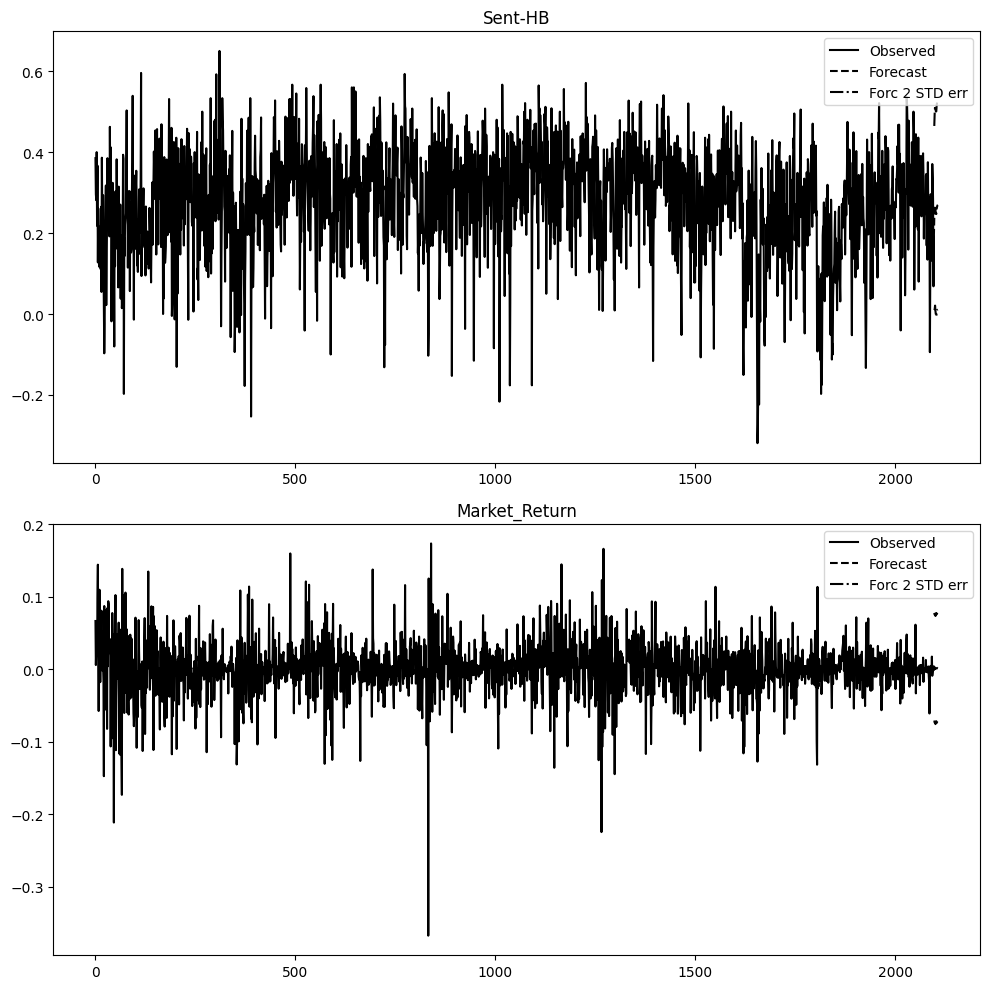

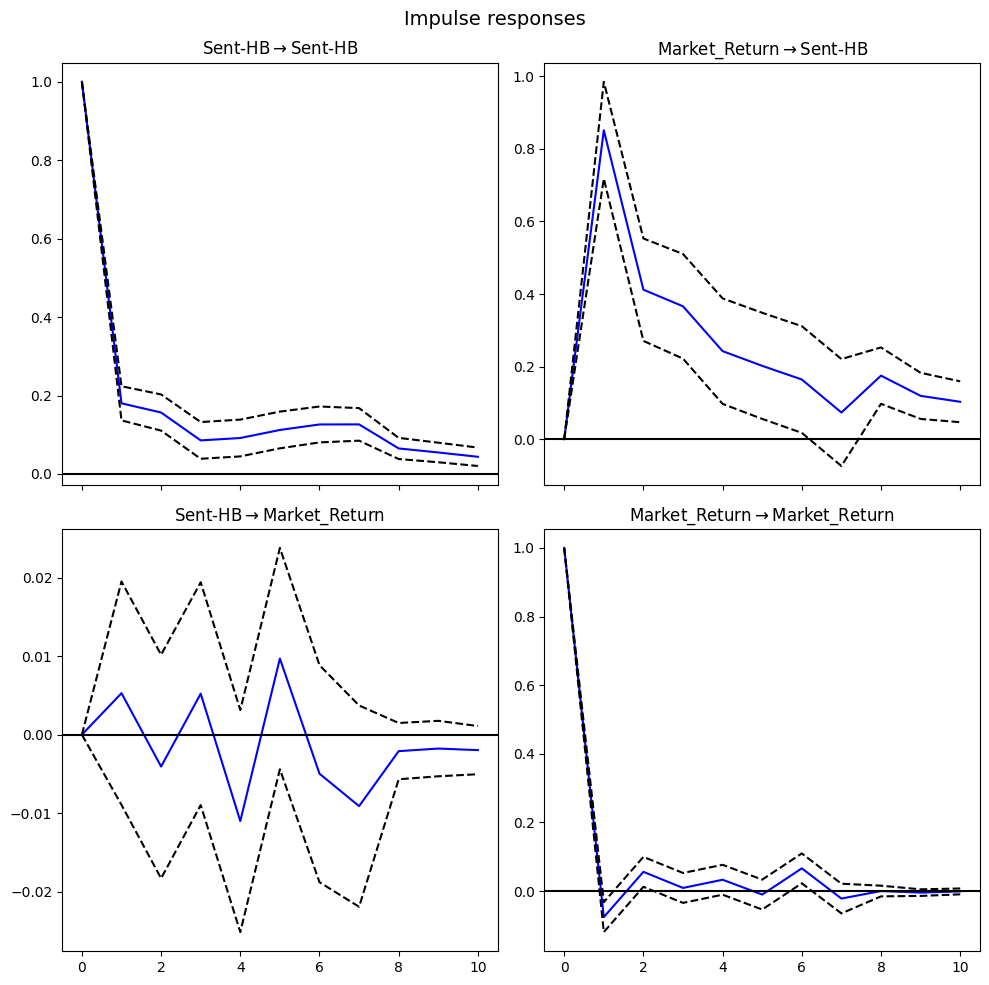

score_full -> mktrtn

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=116.9152, p=0.0000  , df_denom=2093, df_num=1
ssr based chi2 test:   chi2=117.0828, p=0.0000  , df=1
likelihood ratio test: chi2=113.9296, p=0.0000  , df=1
parameter F test:         F=116.9152, p=0.0000  , df_denom=2093, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=70.7785 , p=0.0000  , df_denom=2090, df_num=2
ssr based chi2 test:   chi2=141.8957, p=0.0000  , df=2
likelihood ratio test: chi2=137.2969, p=0.0000  , df=2
parameter F test:         F=70.7785 , p=0.0000  , df_denom=2090, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=49.8409 , p=0.0000  , df_denom=2087, df_num=3
ssr based chi2 test:   chi2=150.0242, p=0.0000  , df=3
likelihood ratio test: chi2=144.8936, p=0.0000  , df=3
parameter F test:         F=49.8409 , p=0.0000  , df_denom=2087, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

In [17]:
# ################################################################################################################
# VAR Global: Table 6
# ################################################################################################################

# score_full, score_full_kr
df = pd.DataFrame()
df['Sent-HB'] = CC_Data_Agg["score_full"]    # X
df['Market_Return'] = CC_Data_Agg["mktrtn_V_Used"]        # Y

fit = sm.tsa.VAR(df.dropna()).fit(maxlags=15, ic='aic')
print(fit.summary())

forecast_num = 10 
fit.plot_forecast(forecast_num) 
plt.tight_layout() 
plt.show()

fit.irf(forecast_num).plot() 
plt.tight_layout() 
plt.show()

# Granger Causality 테스트 : the time series in the second column Granger causes the time series in the first column
print('score_full -> mktrtn')      # Y => X
granger_result1 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,:].values, maxlag=7, verbose=True)    
print('mktrtn -> score_full')      # X => Y
granger_result2 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,[1,0]].values, maxlag=7, verbose=True)

# 해외: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으키지는 않음
# 국내: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으킴

In [20]:
sample1_CC_Data_Agg["mktrtn_V_Used"] 

0      0.095158
1     -0.023231
2      0.041902
3     -0.033019
4      0.002279
         ...   
179    0.059274
180   -0.004249
181   -0.004200
182   -0.022355
183    0.022525
Name: mktrtn_V_Used, Length: 184, dtype: float64

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 28, Jul, 2024
Time:                     22:00:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.5976
Nobs:                     207.000    HQIC:                  -11.6935
Log likelihood:           639.576    FPE:                7.82177e-06
AIC:                     -11.7586    Det(Omega_mle):     7.45717e-06
--------------------------------------------------------------------
Results for equation Sent-HB
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.031038         0.010594            2.930           0.003
L1.Sent-HB               0.204594         0.067935            3.012           0.003
L1.Market_Return         3.867728         0.52

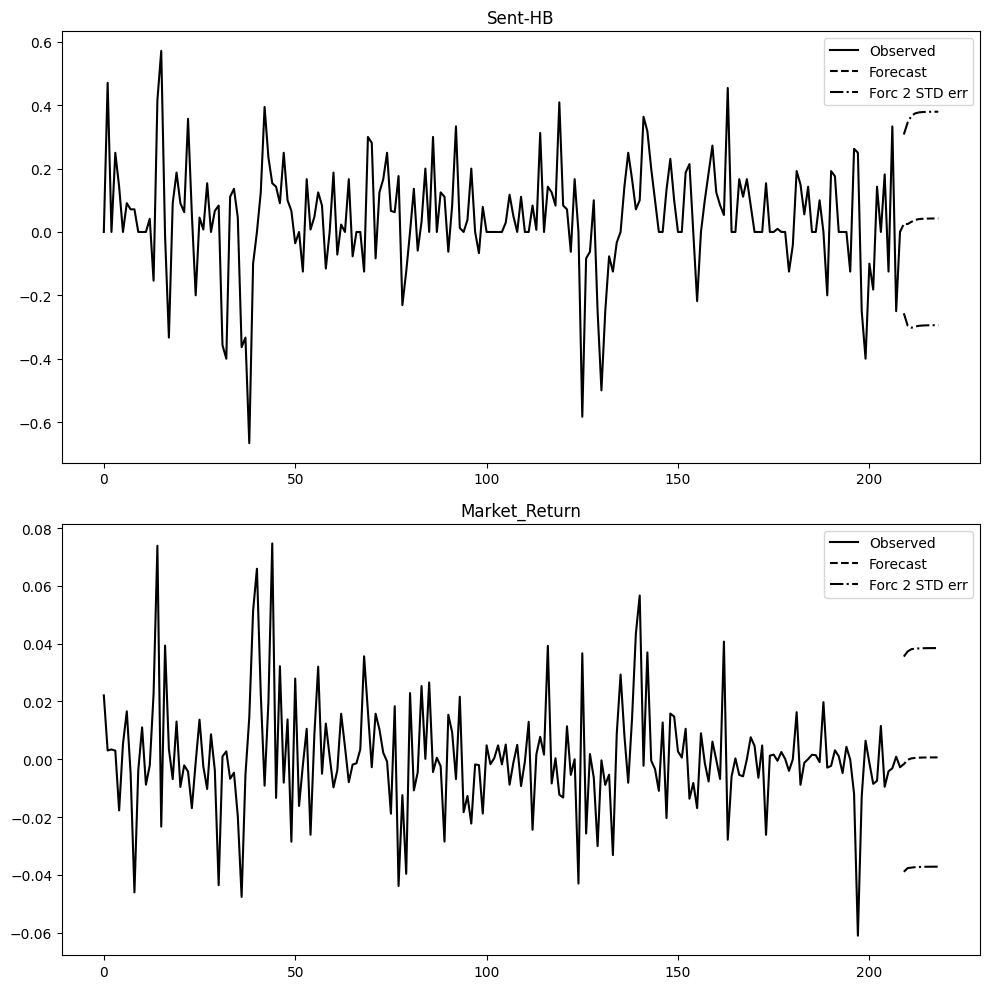

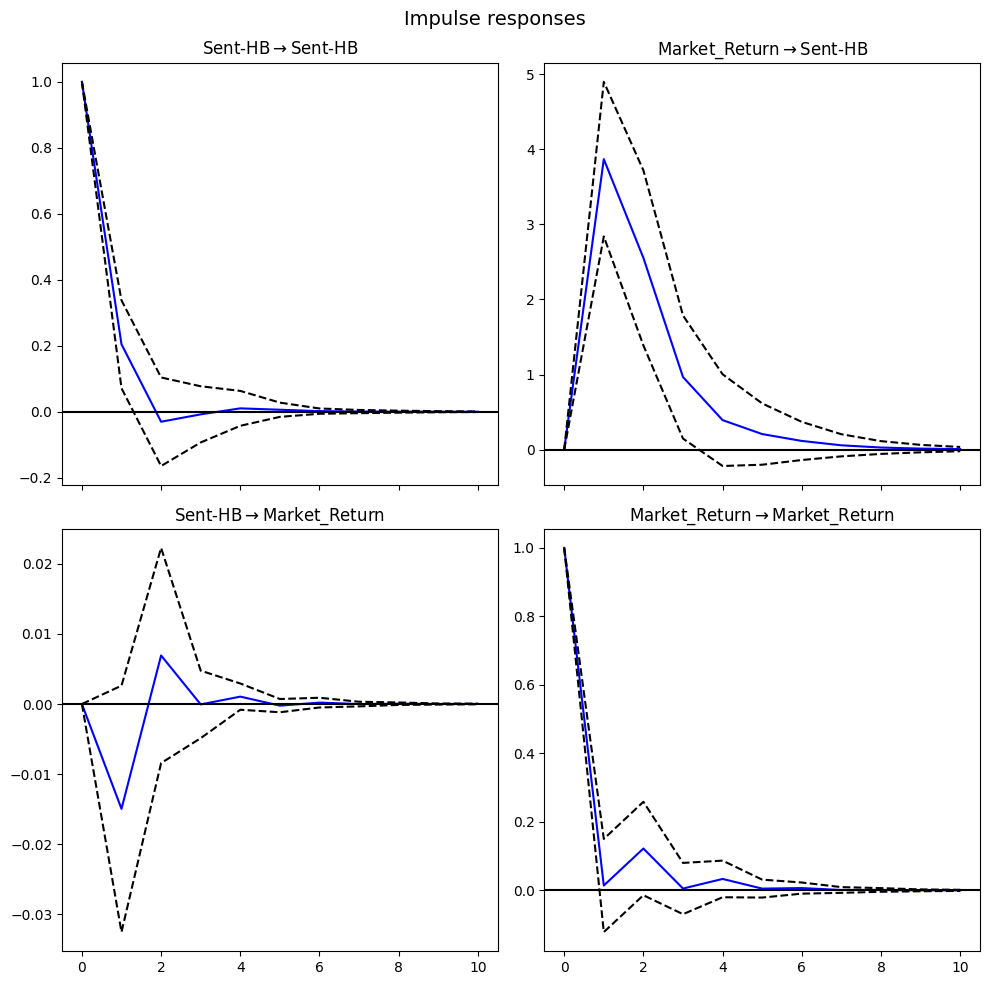

score_full -> mktrtn

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=55.7898 , p=0.0000  , df_denom=205, df_num=1
ssr based chi2 test:   chi2=56.6063 , p=0.0000  , df=1
likelihood ratio test: chi2=50.0666 , p=0.0000  , df=1
parameter F test:         F=55.7898 , p=0.0000  , df_denom=205, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=31.8961 , p=0.0000  , df_denom=202, df_num=2
ssr based chi2 test:   chi2=65.3713 , p=0.0000  , df=2
likelihood ratio test: chi2=56.8106 , p=0.0000  , df=2
parameter F test:         F=31.8961 , p=0.0000  , df_denom=202, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.2739 , p=0.0000  , df_denom=199, df_num=3
ssr based chi2 test:   chi2=72.2778 , p=0.0000  , df=3
likelihood ratio test: chi2=61.9532 , p=0.0000  , df=3
parameter F test:         F=23.2739 , p=0.0000  , df_denom=199, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F

In [37]:
# ################################################################################################################
# VAR Global: Table 6
# ################################################################################################################

# # score_full, score_full_kr
# df = pd.DataFrame()
# df['Sent-HB'] = CC_Data_Agg["score_full_kr"]    # X
# df['Market_Return'] = CC_Data_Agg["mktrtn_V_Used_kr"]        # Y

# sample period
df = pd.DataFrame()
df['Sent-HB'] = sample2_CC_Data_Agg["score_full_kr"]    # X
df['Market_Return'] = sample2_CC_Data_Agg["mktrtn_V_Used_kr"]        # Y

fit = sm.tsa.VAR(df.dropna()).fit(maxlags=15, ic='aic')
print(fit.summary())

forecast_num = 10 
fit.plot_forecast(forecast_num) 
plt.tight_layout() 
plt.show()

fit.irf(forecast_num).plot() 
plt.tight_layout() 
plt.show()

# Granger Causality 테스트 : the time series in the second column Granger causes the time series in the first column
print('score_full -> mktrtn')      # Y => X
granger_result1 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,:].values, maxlag=7, verbose=True)    
print('mktrtn -> score_full')      # X => Y
granger_result2 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,[1,0]].values, maxlag=7, verbose=True)

# 해외: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으키지는 않음
# 국내: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으킴

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2024
Time:                     14:41:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.4938
Nobs:                     2092.00    HQIC:                  -15.5315
Log likelihood:           10353.8    FPE:                1.75925e-07
AIC:                     -15.5532    Det(Omega_mle):     1.74090e-07
--------------------------------------------------------------------
Results for equation mktrtn_V_kr
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.000836         0.000795            1.052           0.293
L1.mktrtn_V_kr         0.054502         0.071878            0.758           0.448
L1.mktrtn_V           -0.057160         0.068846  

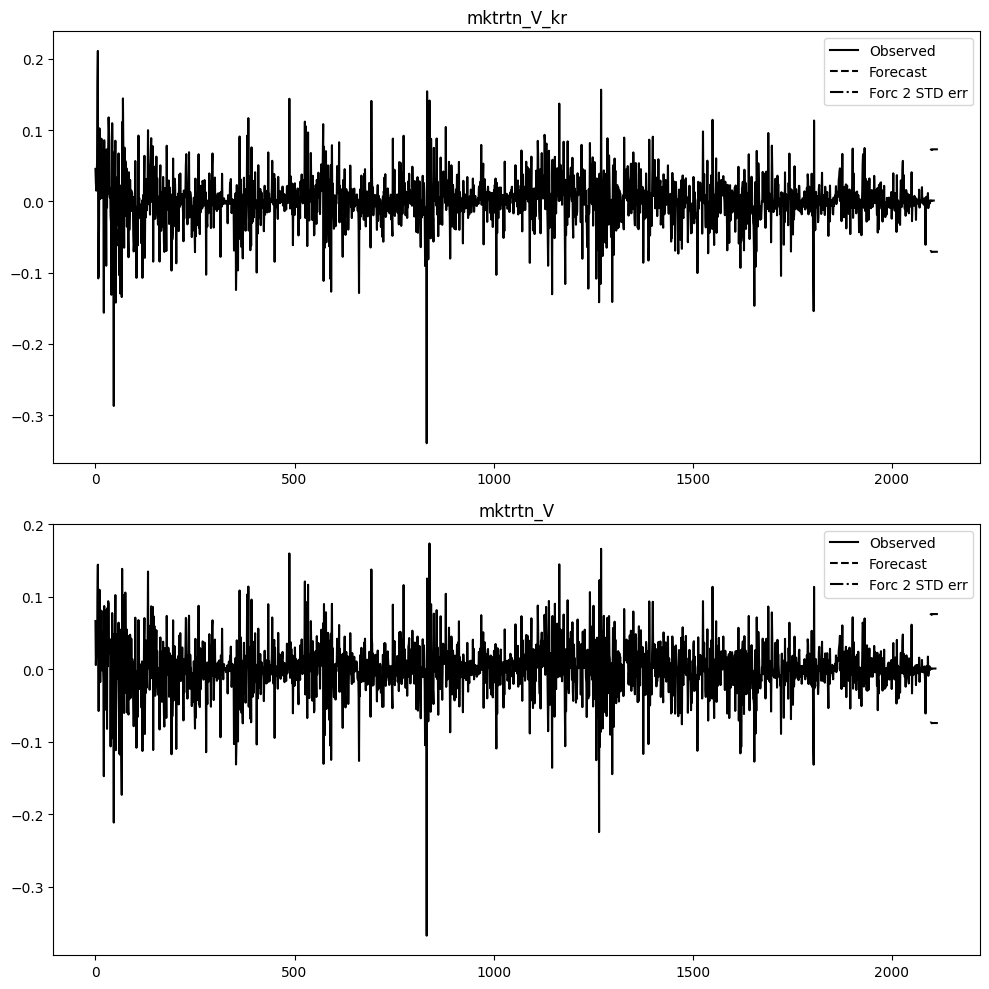

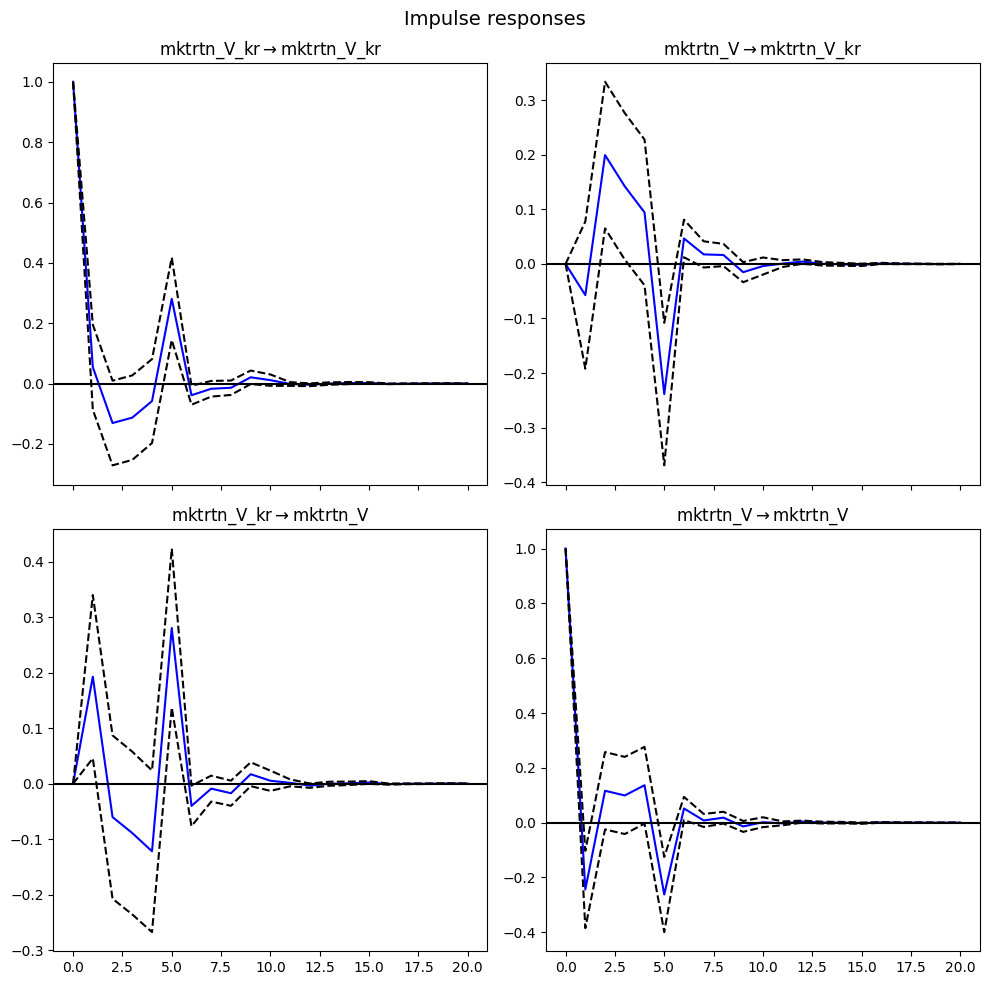

mktrtn_kr -> mktrtn

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6830  , p=0.0172  , df_denom=2093, df_num=1
ssr based chi2 test:   chi2=5.6911  , p=0.0171  , df=1
likelihood ratio test: chi2=5.6834  , p=0.0171  , df=1
parameter F test:         F=5.6830  , p=0.0172  , df_denom=2093, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5799  , p=0.0281  , df_denom=2090, df_num=2
ssr based chi2 test:   chi2=7.1769  , p=0.0276  , df=2
likelihood ratio test: chi2=7.1646  , p=0.0278  , df=2
parameter F test:         F=3.5799  , p=0.0281  , df_denom=2090, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9453  , p=0.0081  , df_denom=2087, df_num=3
ssr based chi2 test:   chi2=11.8757 , p=0.0078  , df=3
likelihood ratio test: chi2=11.8421 , p=0.0079  , df=3
parameter F test:         F=3.9453  , p=0.0081  , df_denom=2087, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:     

c:\Users\user\anaconda3\envs\boyu571\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [23]:
# ################################################################################################################
# VAR Korea: Table 6
# ################################################################################################################

df = pd.DataFrame()
df['mktrtn_V_kr'] = CC_Data_Agg["mktrtn_V_Used_kr"]    # X
df['mktrtn_V'] = CC_Data_Agg["mktrtn_V_Used"]        # Y

fit = sm.tsa.VAR(df.dropna()).fit(maxlags=15, ic='bic')
print(fit.summary())

forecast_num = 20 
fit.plot_forecast(forecast_num) 
plt.tight_layout() 
plt.show()

fit.irf(forecast_num).plot() 
plt.tight_layout() 
plt.show()

# Granger Causality 테스트 
print('mktrtn_kr -> mktrtn')      # X => Y
granger_result1 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,:].values, maxlag=4, verbose=True)    
print('mktrtn -> mktrtn_kr')      # Y => X
granger_result2 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,[1,0]].values, maxlag=4, verbose=True)

# 해외: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으키지는 않음
# 국내: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으킴

In [42]:
# ################################################################################################################
# Forecastability with lagged new sentiment for Global Market: Table 7
# ################################################################################################################

# news_type = ['score_full_kr', 'score_title_kr', 'score_content_kr']
news_type = ['score_full', 'score_title', 'score_content']
results_dfs = []

print("################################################################################################################")
print("Forecastability with lagged factors and news sentiment")

for lags in range(0,4):
    print("=====================================================================================================")
    print("Number of Lags: ", lags)
    print("-----------------------------------------------------------------------------------------------------")
    CC_Data_Agg_lag = CC_Data_Agg.shift(lags)
    CC_Data_Agg_lag = CC_Data_Agg_lag.iloc[lags:,]


    for nt in news_type:

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[[nt]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[[nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")        

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")             

        # Modify the variable name by removing '_e' and appending '_kr'
        nt_kr = nt.replace('_e', '') + '_kr'
        
        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt, nt_kr]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt, nt_kr]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")     
        

# Concatenate all DataFrames in the list into a single DataFrame
final_results_df = pd.concat(results_dfs)

# path = "D:\\Qsync\\consulting\\카카오은행\\data\\Analysis.xlsx"
path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')          


################################################################################################################
Forecastability with lagged factors and news sentiment
Number of Lags:  0
-----------------------------------------------------------------------------------------------------


ValueError: endog and exog matrices are different sizes

In [44]:
# ################################################################################################################
# Forecastability with lagged new sentiment for Korean Market: Table 7
# ################################################################################################################

# news_type = ['score_full_kr', 'score_title_kr', 'score_content_kr']
news_type = ['score_full', 'score_title', 'score_content']
results_dfs = []

print("################################################################################################################")
print("Forecastability with lagged factors and news sentiment")

for lags in range(0,4):
    print("=====================================================================================================")
    print("Number of Lags: ", lags)
    print("-----------------------------------------------------------------------------------------------------")
    CC_Data_Agg_lag = CC_Data_Agg.shift(lags)
    CC_Data_Agg_lag = CC_Data_Agg_lag.iloc[lags:,]


    for nt in news_type:
        nt_kr = nt + '_kr'  # 단순히 'kr'을 붙임

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used_kr'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[[nt_kr]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[[nt_kr]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")        

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used_kr'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")        

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used_kr'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr, nt]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr, nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")     
        

# Concatenate all DataFrames in the list into a single DataFrame
final_results_df = pd.concat(results_dfs)

# path = "D:\\Qsync\\consulting\\카카오은행\\data\\Analysis.xlsx"
path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')


################################################################################################################
Forecastability with lagged factors and news sentiment
Number of Lags:  0
-----------------------------------------------------------------------------------------------------
               Coefficients  t-values R-squared  No_of_Days
const             -0.000480 -0.481752  0.007994      2097.0
score_full_kr      0.014677  3.423622       nan         NaN
-----------------------------------------------------------------------------------------------------
               Coefficients  t-values R-squared  No_of_Days
const             -0.000613 -0.610016  0.011794      2097.0
CSZv_kr           -0.020460 -0.617897       nan         NaN
CMOMv_kr          -0.068616 -1.415913       nan         NaN
score_full_kr      0.014931  3.507265       nan         NaN
-----------------------------------------------------------------------------------------------------
               Coefficients

PermissionError: [Errno 13] Permission denied: 'G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx'

In [47]:
# ################################################################################################################
# Forecastability with lagged new sentiment for Global Market(sample period): Table 7
# ################################################################################################################

# news_type = ['score_full_kr', 'score_title_kr', 'score_content_kr']
news_type = ['score_full', 'score_title', 'score_content']
results_dfs = []

print("################################################################################################################")
print("Forecastability with lagged factors and news sentiment")

for lags in range(0,4):
    print("=====================================================================================================")
    print("Number of Lags: ", lags)
    print("-----------------------------------------------------------------------------------------------------")
    CC_Data_Agg_lag = sample2_CC_Data_Agg.shift(lags)
    CC_Data_Agg_lag = CC_Data_Agg_lag.iloc[lags:,]


    for nt in news_type:

        # Fit the OLS model with robust standard errors
        model = sm.OLS(sample2_CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[[nt]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[[nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")        

        # Fit the OLS model with robust standard errors
        model = sm.OLS(sample2_CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")             

        # Modify the variable name by removing '_e' and appending '_kr'
        nt_kr = nt.replace('_e', '') + '_kr'
        
        # Fit the OLS model with robust standard errors
        model = sm.OLS(sample2_CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt, nt_kr]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt, nt_kr]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")     
        

# Concatenate all DataFrames in the list into a single DataFrame
final_results_df = pd.concat(results_dfs)

# path = "D:\\Qsync\\consulting\\카카오은행\\data\\Analysis.xlsx"
path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')          


################################################################################################################
Forecastability with lagged factors and news sentiment
Number of Lags:  0
-----------------------------------------------------------------------------------------------------
            Coefficients  t-values R-squared  No_of_Days
const           0.003102  0.735319  0.003378       209.0
score_full     -0.010430 -0.752080       nan         NaN
-----------------------------------------------------------------------------------------------------
            Coefficients  t-values R-squared  No_of_Days
const           0.001910  0.480291  0.029334       209.0
CSZv            0.072296  1.810850       nan         NaN
CMOMv          -0.113611 -1.455208       nan         NaN
score_full     -0.009443 -0.715395       nan         NaN
-----------------------------------------------------------------------------------------------------
               Coefficients  t-values R-squared  No

PermissionError: [Errno 13] Permission denied: 'G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx'

In [48]:
# ################################################################################################################
# Forecastability with lagged new sentiment for Korean Market(sample period): Table 7
# ################################################################################################################

# news_type = ['score_full_kr', 'score_title_kr', 'score_content_kr']
news_type = ['score_full', 'score_title', 'score_content']
results_dfs = []

print("################################################################################################################")
print("Forecastability with lagged factors and news sentiment")

for lags in range(0,4):
    print("=====================================================================================================")
    print("Number of Lags: ", lags)
    print("-----------------------------------------------------------------------------------------------------")
    CC_Data_Agg_lag = sample2_CC_Data_Agg.shift(lags)
    CC_Data_Agg_lag = CC_Data_Agg_lag.iloc[lags:,]


    for nt in news_type:
        nt_kr = nt + '_kr'

        # Fit the OLS model with robust standard errors
        model = sm.OLS(sample2_CC_Data_Agg['mktrtn_V_Used_kr'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[[nt_kr]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[[nt_kr]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")        

        # Fit the OLS model with robust standard errors
        model = sm.OLS(sample2_CC_Data_Agg['mktrtn_V_Used_kr'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")        

        # Fit the OLS model with robust standard errors
        model = sm.OLS(sample2_CC_Data_Agg['mktrtn_V_Used_kr'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr, nt]].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv_kr', 'CMOMv_kr', nt_kr, nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")     
        

# Concatenate all DataFrames in the list into a single DataFrame
final_results_df = pd.concat(results_dfs)

# path = "D:\\Qsync\\consulting\\카카오은행\\data\\Analysis.xlsx"
path = "G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx"
if not os.path.exists(path):    
    with pd.ExcelWriter(path, engine="openpyxl", mode='w') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')
else:
    with pd.ExcelWriter(path, engine="openpyxl", mode='a') as writer:
        final_results_df.to_excel(writer, sheet_name = 'lagged_WD=>WD')


################################################################################################################
Forecastability with lagged factors and news sentiment
Number of Lags:  0
-----------------------------------------------------------------------------------------------------
               Coefficients  t-values R-squared  No_of_Days
const              0.000905  0.678639  0.000614       209.0
score_full_kr     -0.002746 -0.309991       nan         NaN
-----------------------------------------------------------------------------------------------------
               Coefficients  t-values R-squared  No_of_Days
const              0.001114  0.773815  0.005732       209.0
CSZv_kr            0.039244  0.645556       nan         NaN
CMOMv_kr           0.071366  0.666781       nan         NaN
score_full_kr     -0.002395 -0.275197       nan         NaN
-----------------------------------------------------------------------------------------------------
               Coefficients

PermissionError: [Errno 13] Permission denied: 'G:\\내 드라이브\\DATASET\\Kakao\\tables\\Analysis.xlsx'

In [52]:
# ################################################################################################################
# Table 9 Robustness  Out-of Sample Forecasting
# ################################################################################################################


print("################################################################################################################")
print("Forecastability with lagged factors and news sentiment")
# ################################################################################################################

RTNs = ['mktrtn_V_Used', 'mktrtn_V_Used_kr', 'BTC','ETH','XRP']
news_type = ["score_full_4.0",'score_full_e', 'score_full_kr']

nt = "score_full_4.0"
results_score_full_4 = pd.DataFrame(np.empty((len(date),40))*np.nan, index=date)
results_score_full_4_cum = pd.DataFrame(np.empty((len(date),40))*np.nan, index=date)

for rt in range(0,len(RTNs)):

    for fhz in range(0,8):

        print("=====================================================================================================")
        print("Sentiment: ", nt, "      Target CC: ", RTNs[rt], "      Number of Lags: ", fhz)
        print("-----------------------------------------------------------------------------------------------------")

        for t in range(0,len(date)-fhz):
        
            if CC_Data_Agg[nt].iloc[t]>=0.121:
                results_score_full_4.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+fhz]
                if fhz>0:
                    results_score_full_4_cum.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+1:t+fhz+1].sum()
            else:
                results_score_full_4.iloc[t+fhz, fhz+8*rt] = CC_Data_Agg[RTNs[rt]].iloc[t+fhz] * (-1)
                if fhz>0:
                    results_score_full_4_cum.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+1:t+fhz+1].sum()* (-1)



nt = "score_full_e"
results_score_full = pd.DataFrame(np.empty((len(date),40))*np.nan, index=date)
results_score_full_cum = pd.DataFrame(np.empty((len(date),40))*np.nan, index=date)

for rt in range(0,len(RTNs)):

    for fhz in range(0,8):

        print("=====================================================================================================")
        print("Sentiment: ", nt, "      Target CC: ", RTNs[rt], "      Number of Lags: ", fhz)
        print("-----------------------------------------------------------------------------------------------------")

        for t in range(0,len(date)-fhz):
        
            # print(nt, t, CC_Data_Agg[nt].iloc[t], CC_Data_Agg[RTNs[rt]].iloc[t+fhz])    

            if CC_Data_Agg[nt].iloc[t]>=0.282:
                results_score_full.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+fhz]
                if fhz>0:
                    results_score_full_cum.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+1:t+fhz+1].sum()
            else:
                results_score_full.iloc[t+fhz, fhz+8*rt] = CC_Data_Agg[RTNs[rt]].iloc[t+fhz] * (-1)
                if fhz>0:
                    results_score_full_cum.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+1:t+fhz+1].sum()* (-1)


nt = "score_full_kr"
results_score_full_kr = pd.DataFrame(np.empty((len(date),40))*np.nan, index=date)
results_score_full_kr_cum = pd.DataFrame(np.empty((len(date),40))*np.nan, index=date)

for rt in range(0,len(RTNs)):

    for fhz in range(0,8):

        print("=====================================================================================================")
        print("Sentiment: ", nt, "      Target CC: ", RTNs[rt], "      Number of Lags: ", fhz)
        print("-----------------------------------------------------------------------------------------------------")

        for t in range(0,len(date)-fhz):
        
            # print(nt, t, CC_Data_Agg[nt].iloc[t], CC_Data_Agg[RTNs[rt]].iloc[t+fhz])    

            if CC_Data_Agg[nt].iloc[t]>=0.108:
                results_score_full_kr.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+fhz]
                if fhz>0:
                    results_score_full_kr_cum.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+1:t+fhz+1].sum()
            else:
                results_score_full_kr.iloc[t+fhz, fhz+8*rt] = CC_Data_Agg[RTNs[rt]].iloc[t+fhz] * (-1)
                if fhz>0:
                    results_score_full_kr_cum.iloc[t+fhz, fhz+8*rt] =  CC_Data_Agg[RTNs[rt]].iloc[t+1:t+fhz+1].sum()* (-1)                          


results_forecast = pd.concat([results_score_full, results_score_full_kr, results_score_full_4],axis=1)
results_forecast_cum = pd.concat([results_score_full_cum, results_score_full_kr_cum, results_score_full_4_cum],axis=1)


################################################################################################################
Forecastability with lagged factors and news sentiment
Sentiment:  score_full_4.0       Target CC:  mktrtn_V_Used       Number of Lags:  0
-----------------------------------------------------------------------------------------------------
Sentiment:  score_full_4.0       Target CC:  mktrtn_V_Used       Number of Lags:  1
-----------------------------------------------------------------------------------------------------
Sentiment:  score_full_4.0       Target CC:  mktrtn_V_Used       Number of Lags:  2
-----------------------------------------------------------------------------------------------------
Sentiment:  score_full_4.0       Target CC:  mktrtn_V_Used       Number of Lags:  3
-----------------------------------------------------------------------------------------------------
Sentiment:  score_full_4.0       Target CC:  mktrtn_V_Used       Number of Lags:  4
----

In [54]:
results_forecast

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20171201,0.066502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.066502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.045456,NaN,...,NaN,NaN,-0.019217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171202,0.005754,0.005754,NaN,NaN,NaN,NaN,NaN,NaN,0.026497,0.026497,NaN,NaN,NaN,NaN,NaN,NaN,0.009020,0.009020,NaN,NaN,NaN,NaN,NaN,NaN,-0.006625,-0.006625,NaN,NaN,NaN,NaN,NaN,NaN,-0.000810,-0.000810,NaN,NaN,NaN,NaN,NaN,NaN,0.005754,-0.005754,NaN,NaN,NaN,NaN,NaN,NaN,0.026497,-0.026497,...,NaN,NaN,-0.000810,0.000810,NaN,NaN,NaN,NaN,NaN,NaN,0.005754,0.005754,NaN,NaN,NaN,NaN,NaN,NaN,0.026497,0.026497,NaN,NaN,NaN,NaN,NaN,NaN,0.009020,0.009020,NaN,NaN,NaN,NaN,NaN,NaN,-0.006625,-0.006625,NaN,NaN,NaN,NaN,NaN,NaN,-0.000810,-0.000810,NaN,NaN,NaN,NaN,NaN,NaN
20171203,-0.026693,0.026693,0.026693,NaN,NaN,NaN,NaN,NaN,-0.014888,0.014888,0.014888,NaN,NaN,NaN,NaN,NaN,-0.022448,0.022448,0.022448,NaN,NaN,NaN,NaN,NaN,-0.005187,0.005187,0.005187,NaN,NaN,NaN,NaN,NaN,0.011484,-0.011484,-0.011484,NaN,NaN,NaN,NaN,NaN,0.026693,0.026693,-0.026693,NaN,NaN,NaN,NaN,NaN,0.014888,0.014888,...,NaN,NaN,-0.011484,-0.011484,0.011484,NaN,NaN,NaN,NaN,NaN,0.026693,0.026693,0.026693,NaN,NaN,NaN,NaN,NaN,0.014888,0.014888,0.014888,NaN,NaN,NaN,NaN,NaN,0.022448,0.022448,0.022448,NaN,NaN,NaN,NaN,NaN,0.005187,0.005187,0.005187,NaN,NaN,NaN,NaN,NaN,-0.011484,-0.011484,-0.011484,NaN,NaN,NaN,NaN,NaN
20171204,0.036993,-0.036993,0.036993,0.036993,NaN,NaN,NaN,NaN,0.037121,-0.037121,0.037121,0.037121,NaN,NaN,NaN,NaN,0.029497,-0.029497,0.029497,0.029497,NaN,NaN,NaN,NaN,0.009340,-0.009340,0.009340,0.009340,NaN,NaN,NaN,NaN,0.004011,-0.004011,0.004011,0.004011,NaN,NaN,NaN,NaN,0.036993,0.036993,0.036993,-0.036993,NaN,NaN,NaN,NaN,0.037121,0.037121,...,NaN,NaN,0.004011,0.004011,0.004011,-0.004011,NaN,NaN,NaN,NaN,0.036993,0.036993,0.036993,0.036993,NaN,NaN,NaN,NaN,0.037121,0.037121,0.037121,0.037121,NaN,NaN,NaN,NaN,0.029497,0.029497,0.029497,0.029497,NaN,NaN,NaN,NaN,0.009340,0.009340,0.009340,0.009340,NaN,NaN,NaN,NaN,0.004011,0.004011,0.004011,0.004011,NaN,NaN,NaN,NaN
20171205,-0.018731,0.018731,-0.018731,0.018731,0.018731,NaN,NaN,NaN,-0.054462,0.054462,-0.054462,0.054462,0.054462,NaN,NaN,NaN,-0.022261,0.022261,-0.022261,0.022261,0.022261,NaN,NaN,NaN,0.014723,-0.014723,0.014723,-0.014723,-0.014723,NaN,NaN,NaN,0.029459,-0.029459,0.029459,-0.029459,-0.029459,NaN,NaN,NaN,0.018731,0.018731,0.018731,0.018731,-0.018731,NaN,NaN,NaN,0.054462,0.054462,...,NaN,NaN,-0.029459,-0.029459,-0.029459,-0.029459,0.029459,NaN,NaN,NaN,0.018731,0.018731,0.018731,0.018731,0.018731,NaN,NaN,NaN,0.054462,0.054462,0.054462,0.054462,0.054462,NaN,NaN,NaN,0.022261,0.022261,0.022261,0.022261,0.022261,NaN,NaN,NaN,-0.014723,-0.014723,-0.014723,-0.014723,-0.014723,NaN,NaN,NaN,-0.029459,-0.029459,-0.029459,-0.029459,-0.029459,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230824,-0.009097,0.009097,0.009097,0.009097,-0.009097,0.009097,0.009097,0.009097,-0.009522,0.009522,0.009522,0.009522,-0.009522,0.009522,0.

In [55]:
pd.set_option('display.max_rows', 300)
pd.concat([results_forecast.mean(axis=0), results_forecast.std(axis=0)],axis=1)


,0,1
0,0.004192,0.038043
1,0.000137,0.038255
2,-0.000463,0.038261
3,-0.000505,0.038265
4,-0.001501,0.038240
5,0.000786,0.038268
6,-0.000566,0.038220
7,-0.000082,0.038103
8,0.004533,0.036342
9,0.000894,0.036608


In [47]:
pd.set_option('display.max_rows', 300)
pd.concat([results_forecast_cum.mean(axis=0), results_forecast_cum.std(axis=0)],axis=1)

,0,1
0,NaN,NaN
1,0.000078,0.038255
2,-0.000386,0.052150
3,-0.000818,0.064411
4,-0.002066,0.074920
5,-0.001135,0.084724
6,-0.001663,0.093275
7,-0.001687,0.101878
8,NaN,NaN
9,0.000846,0.036610


In [48]:
print(CC_Data_Agg['BTC'].mean(), CC_Data_Agg['ETH'].mean(),CC_Data_Agg['XRP'].mean())

0.0011858786706520881 0.0018108561261321568 0.002335229623428213


################################################################################################################
Forecastability with lagged factors and news sentiment
Number of Lags:  0
-----------------------------------------------------------------------------------------------------
                Coefficients  t-values R-squared  No_of_Days
const              -0.003136 -2.558790  0.021648      2097.0
score_full_4.0      0.034109  5.878485       NaN         NaN
-----------------------------------------------------------------------------------------------------
                Coefficients  t-values R-squared  No_of_Days
const              -0.003674 -2.857356  0.029662      2097.0
CSZv               -0.004209 -0.243425       NaN         NaN
CMOMv              -0.058052 -1.689317       NaN         NaN
score_full_4.0      0.033823  5.929627       NaN         NaN
-----------------------------------------------------------------------------------------------------
                Coe

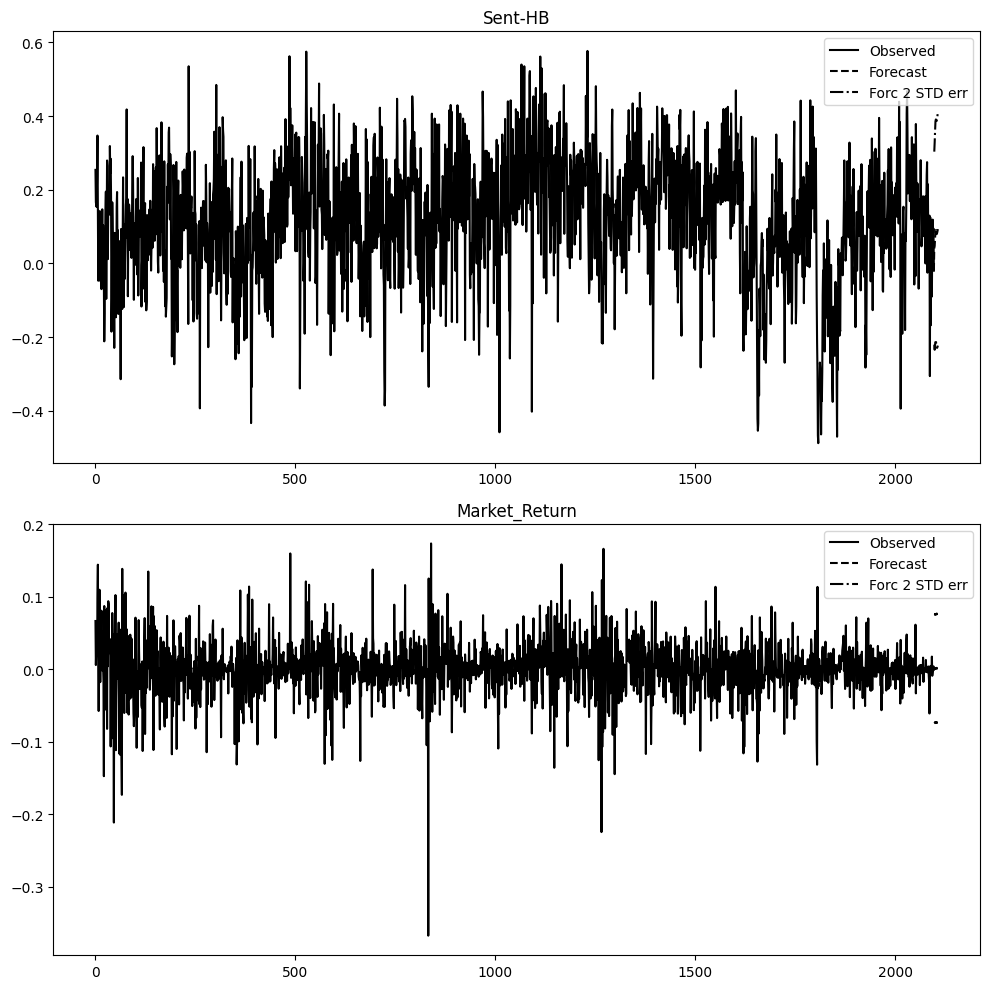

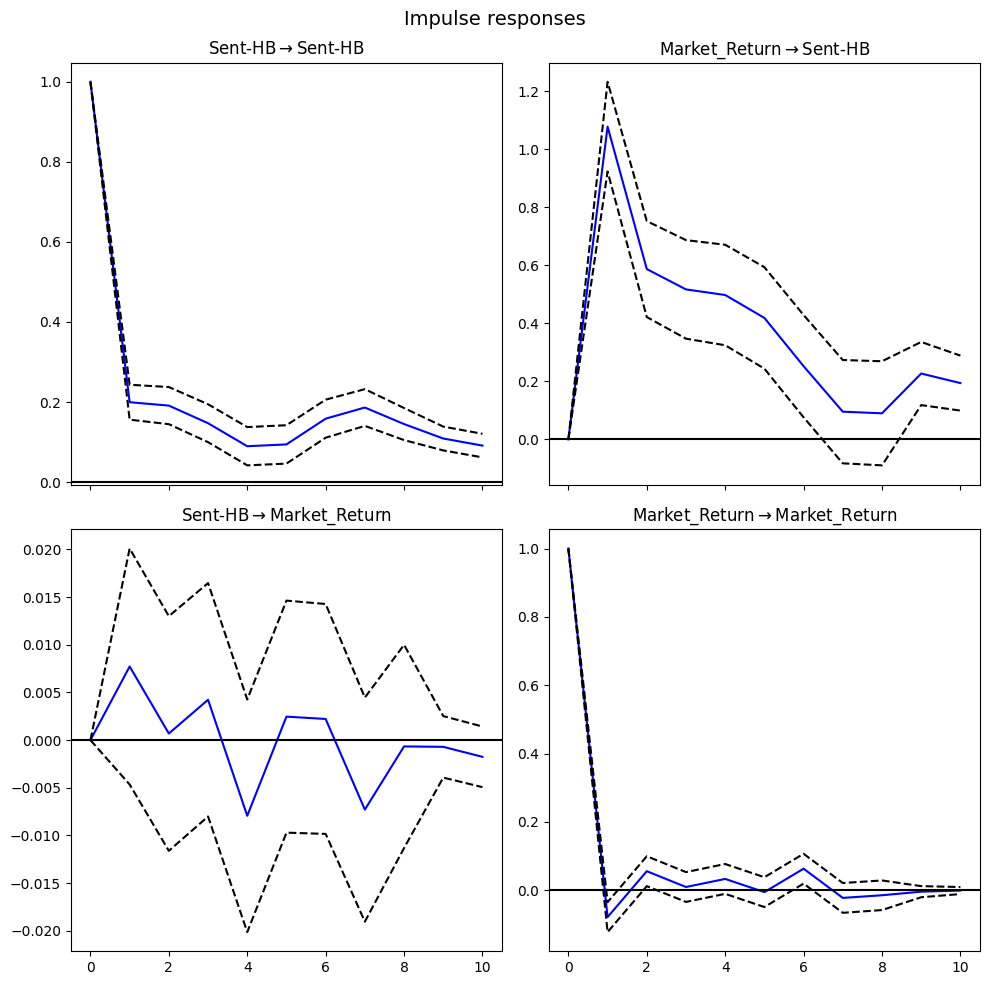

score_full -> mktrtn

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=119.5769, p=0.0000  , df_denom=2093, df_num=1
ssr based chi2 test:   chi2=119.7483, p=0.0000  , df=1
likelihood ratio test: chi2=116.4525, p=0.0000  , df=1
parameter F test:         F=119.5769, p=0.0000  , df_denom=2093, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=74.2226 , p=0.0000  , df_denom=2090, df_num=2
ssr based chi2 test:   chi2=148.8003, p=0.0000  , df=2
likelihood ratio test: chi2=143.7535, p=0.0000  , df=2
parameter F test:         F=74.2226 , p=0.0000  , df_denom=2090, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=53.9308 , p=0.0000  , df_denom=2087, df_num=3
ssr based chi2 test:   chi2=162.3352, p=0.0000  , df=3
likelihood ratio test: chi2=156.3502, p=0.0000  , df=3
parameter F test:         F=53.9308 , p=0.0000  , df_denom=2087, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:    

In [21]:
# ################################################################################################################
# Table 9 Robustness  ChatGPT4
# ################################################################################################################


# ################################################################################################################
# Forecastability with lagged new sentiment ChatGPT4 for Global Market
# ################################################################################################################

# news_type = ['score_full_kr', 'score_title_kr', 'score_content_kr']
news_type = ['score_full_e', 'score_title_e']
results_dfs = []

print("################################################################################################################")
print("Forecastability with lagged factors and news sentiment")

for lags in range(0,4):
    print("=====================================================================================================")
    print("Number of Lags: ", lags)
    print("-----------------------------------------------------------------------------------------------------")
    CC_Data_Agg_lag = CC_Data_Agg.shift(lags)
    CC_Data_Agg_lag = CC_Data_Agg_lag.iloc[lags:,]


    for nt in news_type:

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[[nt+'_4.0']].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[[nt+'_4.0']].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")        

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt+'_4.0']].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt+'_4.0']].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")             

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg['mktrtn_V_Used'].iloc[lags:,].values, sm.add_constant(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt+'_4.0', nt+'_kr']].values)).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg_lag[['CSZv', 'CMOMv', nt+'_4.0', nt+'_kr']].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg_lag)    
        results_dfs.append(results_df)
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")     



# ################################################################################################################
# VAR Global ChatGPT4 
# ################################################################################################################

print("################################################################################################################") 
print("VAR Global ChatGPT4") 
print("-----------------------------------------------------------------------------------------------------") 

df = pd.DataFrame()
df['Sent-HB'] = CC_Data_Agg["score_full_4.0"]    # X
df['Market_Return'] = CC_Data_Agg["mktrtn_V_Used"]        # Y

fit = sm.tsa.VAR(df.dropna()).fit(maxlags=15, ic='aic')
print(fit.summary())

forecast_num = 10 
fit.plot_forecast(forecast_num) 
plt.tight_layout() 
plt.show()

fit.irf(forecast_num).plot() 
plt.tight_layout() 
plt.show()

# Granger Causality 테스트 : the time series in the second column Granger causes the time series in the first column
print('score_full -> mktrtn')      # Y => X
granger_result1 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,:].values, maxlag=8, verbose=True)    
print('mktrtn -> score_full')      # X => Y
granger_result2 = sm.tsa.stattools.grangercausalitytests(df.dropna().iloc[:,[1,0]].values, maxlag=8, verbose=True)

# 해외: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으키지는 않음
# 국내: 암호화폐가격상승이 양의 뉴스를 생산, 양의 뉴스가 암호화폐가격상승을 일으킴

In [22]:
# ################################################################################################################
# World Data : Explanation of CC Factor Returns  JF, 2022
# ################################################################################################################
# mktrtn_V	mktrtn_V_Used	No_CC	mktcap_Used	vol	SZ_BMSv	SZ_BMSe	PR_HMLv	PR_HMLe	Max_MMLv	Max_MMLe	Mom_WMLv	Mom_WMLe	
# Tvol_HMLv	Tvol_HMLe	STvol_HMLv	STvol_HMLe	Vol_HMLv	Vol_HMLe	CSZv	CMOMv	CSZe	CMOMe	
# mktrtn_V_kr	mktrtn_E_kr	No_CC_kr	vol_kr	SZ_BMSv_kr	SZ_BMSe_kr	PR_HMLv_kr	PR_HMLe_kr	Max_MMLv_kr	Max_MMLe_kr	Mom_WMLv_kr	Mom_WMLe_kr	Tvol_HMLv_kr	
# Tvol_HMLe_kr	STvol_HMLv_kr	STvol_HMLe_kr	Vol_HMLv_kr	Vol_HMLe_kr	CSZv_kr	CMOMv_kr	CSZe_kr	CMOMe_kr

print("################################################################################################################")
print("World Data : Explanation of CC Factor Returns")
print("=====================================================================================================")

cc_factors = ['SZ_BMSv', 'PR_HMLv', 'Max_MMLv', 'Mom_WMLv', 'Tvol_HMLv', 'STvol_HMLv', 'Vol_HMLv', 'PR_HMLv', 'Max_MMLv'] 
news_type = ['score_full', 'score_title', 'score_content']

for fctr in cc_factors:
    print("################################################################################################################")
    print("CC_Factor : ", fctr)
    print("=====================================================================================================")

    # Fit the OLS model without explanatory variables
    model = sm.OLS(CC_Data_Agg[fctr], np.ones(len(CC_Data_Agg[fctr]))).fit().get_robustcov_results()
    # Fit the OLS model with robust standard errors
    if isinstance(model.params, pd.Series) and model.params.index is not None:
        # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=model.params.index)
    else:
        # Manually create an index for the DataFrame
        index_names = ['const']
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=index_names)
    results_df.loc['const', 'R-squared'] = 'R-squared'
    results_df.loc['const', 'R-squared'] = model.rsquared    
    results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    print(results_df)
    print("-----------------------------------------------------------------------------------------------------")

    # Fit the OLS model with robust standard errors
    model = sm.OLS(CC_Data_Agg[fctr], sm.add_constant(CC_Data_Agg[['mktrtn_V']])).fit().get_robustcov_results()
    if isinstance(model.params, pd.Series) and model.params.index is not None:
        # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=model.params.index)
    else:
        index_names = ['const'] + list(CC_Data_Agg[['mktrtn_V']].columns)
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=index_names)
        results_df.loc['const', 'R-squared'] = 'R-squared'
    results_df.loc['const', 'R-squared'] = model.rsquared   
    results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    print(results_df)
    print("-----------------------------------------------------------------------------------------------------")


    # Fit the OLS model with robust standard errors
    model = sm.OLS(CC_Data_Agg[fctr], sm.add_constant(CC_Data_Agg[['mktrtn_V', 'CSZv', 'CMOMv']])).fit().get_robustcov_results()
    if isinstance(model.params, pd.Series) and model.params.index is not None:
        # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=model.params.index)
    else:
        index_names = ['const'] + list(CC_Data_Agg[['mktrtn_V', 'CSZv', 'CMOMv']].columns)
        results_df = pd.DataFrame({
            'Coefficients': model.params,
            't-values': model.tvalues
        }, index=index_names)
        results_df.loc['const', 'R-squared'] = 'R-squared'
    results_df.loc['const', 'R-squared'] = model.rsquared   
    results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
    print(results_df)
    print("-----------------------------------------------------------------------------------------------------")


    for nt in news_type:
        print("=====================================================================================================")
        print("News Type: ", nt)
        print("-----------------------------------------------------------------------------------------------------")

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg[fctr], sm.add_constant(CC_Data_Agg[[nt]])).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg[[nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg[fctr], sm.add_constant(CC_Data_Agg[['mktrtn_V', nt]])).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg[['mktrtn_V', nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")

        # Fit the OLS model with robust standard errors
        model = sm.OLS(CC_Data_Agg[fctr], sm.add_constant(CC_Data_Agg[['mktrtn_V','CSZv', 'CMOMv', nt]])).fit().get_robustcov_results()
        if isinstance(model.params, pd.Series) and model.params.index is not None:
            # Create a DataFrame with coefficients and robust standard errors, using the parameter names as the index
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=model.params.index)
        else:
            index_names = ['const'] + list(CC_Data_Agg[['mktrtn_V', 'CSZv', 'CMOMv', nt]].columns)
            results_df = pd.DataFrame({
                'Coefficients': model.params,
                't-values': model.tvalues
            }, index=index_names)
            results_df.loc['const', 'R-squared'] = 'R-squared'
        results_df.loc['const', 'R-squared'] = model.rsquared   
        results_df.loc['const', 'No_of_Days'] = len(CC_Data_Agg) 
        print(results_df)
        print("-----------------------------------------------------------------------------------------------------")

################################################################################################################
World Data : Explanation of CC Factor Returns
################################################################################################################
CC_Factor :  SZ_BMSv
       Coefficients  t-values R-squared  No_of_Days
const     -0.015374 -3.597319      -0.0      2097.0
-----------------------------------------------------------------------------------------------------
          Coefficients  t-values R-squared  No_of_Days
const        -0.015454 -3.618601  0.000435      2097.0
mktrtn_V      0.103940  1.985275       NaN         NaN
-----------------------------------------------------------------------------------------------------
          Coefficients   t-values R-squared  No_of_Days
const        -0.001001  -0.543263  0.942648      2097.0
mktrtn_V     -0.010348  -0.178264       NaN         NaN
CSZv          1.921109  14.486915       NaN         NaN
CMOMv     